<hr/>
[**Tolgahan Cepel**](https://www.kaggle.com/tolgahancepel)
#https://scikit-learn.org/stable/modules/model_evaluation.html
#https://datascience.stackexchange.com/questions/38395/standardscaler-before-and-after-splitting-data

## <span id="1"></span> ** 1. Overview **

## <span id="2"></span> ** 2. Importing Libraries and Reading the Dataset **

In [1]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
from datetime import datetime

In [2]:
from sklearn.datasets import load_boston


filepath = '../data_with_T_Z_B_P_noDup.csv'
df = pd.read_csv(filepath,  index_col = 0)
to_exclude=["Community.Name", "Avg_Consumption_per_person"]
dataset_original=df.drop(to_exclude, axis=1)


#Adding the Month seperately as cyclical 
#http://blog.davidkaleko.com/feature-engineering-cyclical-features.html

dataset_original["month_int"]=dataset_original['calendar_month'].astype(str).str[4:].astype(np.int64)



#dataset_original['month_sin'] = np.sin((dataset_original.month_int-1)*(2.*np.pi/12))
#dataset_original['month_cos'] = np.cos((dataset_original.month_int-1)*(2.*np.pi/12))
#dataset_original=dataset_original.drop(["month_int"], axis=1)

dataset_original

,ID,consumption_unit_total,calendar_month,community,year,temperature,NumOfConnected-COMMELEC,NumOfConnected-FREENRESIE,NumOfConnected-FREERESIE,NumOfConnected-GOVTELEC,...,Private.Villa,Investment.Villa,Arabic.House,Public.Building,Industrial.Building,Other.Buildings,Total.Buildings,population,population_density,month_int
1,201704-111,4.539462e+06,201704,111,2017,30.8,28,0,0,13,...,0.0,0.0,0.0,4.0,0.0,0.0,6.0,1550.0,258.333333,4
2,201704-112,1.001234e+07,201704,112,2017,30.8,3000,0,0,22,...,0.0,0.0,12.0,185.0,0.0,0.0,401.0,6621.0,16.511222,4
3,201704-113,1.263421e+07,201704,113,2017,30.8,3158,0,0,4,...,0.0,0.0,21.0,55.0,0.0,0.0,383.0,14963.0,39.067885,4
4,201704-114,1.003799e+07,201704,114,2017,30.8,3317,0,0,4,...,0.0,0.0,1.0,157.0,0.0,0.0,332.0,2563.0,7.719880,4
5,201704-115,6.275032e+06,201704,115,2017,30.8,1304,0,0,8,...,0.0,0.0,0.0,33.0,0.0,0.0,106.0,3750.0,35.377358,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7418,202002-967,1.259622e+05,202002,967,2020,22.7,7,1,0,1,...,3.0,0.0,0.0,5.0,0.0,5.0,14.0,NaN,NaN,2
7419,202002-971,2.407988e+05,202002,971,2020,22.7,4,14,0,1,...,1.0,0.0,0.0,7.0,0.0,3.0,11.0,NaN,NaN,2
7420,202002-981,9.235249e+04,202002,981,2020,22.7,9,0,0,3,...,4.0,0.0,0.0,6.0,0.0,1.0,20.0,NaN,NaN,2
7421,202002-987,7.757116e+03,202002,987,2020,22.7,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,NaN,NaN,2


In [3]:
dataset_original_copy = dataset_original.copy()

In [4]:
dataset_original[dataset_original.calendar_month <201811].iloc[0]

ID                              201704-111
consumption_unit_total         4.53946e+06
calendar_month                      201704
community                              111
year                                  2017
temperature                           30.8
NumOfConnected-COMMELEC                 28
NumOfConnected-FREENRESIE                0
NumOfConnected-FREERESIE                 0
NumOfConnected-GOVTELEC                 13
NumOfConnected-INDTELEC                  0
NumOfConnected-RESIEXPE                  0
NumOfConnected-RESINATE                  0
NumOfConnected-RESINATSE                 0
NumOfConnected-ENORATE                   0
NumOfConnected-TOTAL                    41
Expat_Ratio                            NaN
One.Storey.Building                      0
Multi.Storey.Building                    2
Multi.Storey.Ratio.Building              0
Private.Villa                            0
Investment.Villa                         0
Arabic.House                             0
Public.Buil

In [5]:
dataset_original.loc[dataset_original.calendar_month  <201811 ,
                     "consumption_unit_total"] = dataset_original.consumption_unit_total/2

In [6]:
dataset_original[dataset_original.calendar_month <201811].iloc[2]

ID                             201704-113
consumption_unit_total         6.3171e+06
calendar_month                     201704
community                             113
year                                 2017
temperature                          30.8
NumOfConnected-COMMELEC              3158
NumOfConnected-FREENRESIE               0
NumOfConnected-FREERESIE                0
NumOfConnected-GOVTELEC                 4
NumOfConnected-INDTELEC                 0
NumOfConnected-RESIEXPE              1499
NumOfConnected-RESINATE                 6
NumOfConnected-RESINATSE                0
NumOfConnected-ENORATE                  0
NumOfConnected-TOTAL                 4667
Expat_Ratio                      0.996013
One.Storey.Building                     0
Multi.Storey.Building                 307
Multi.Storey.Ratio.Building             0
Private.Villa                           0
Investment.Villa                        0
Arabic.House                           21
Public.Building                   

In [7]:
for i in range(1,13):
    print(i, 1+np.round(-1*np.cos((i-1)*(2.*np.pi/12)),4))

1 0.0
2 0.134
3 0.5
4 1.0
5 1.5
6 1.866
7 2.0
8 1.866
9 1.5
10 1.0
11 0.5
12 0.134


In [8]:
dataset_original['month_int']

1       4
2       4
3       4
4       4
5       4
       ..
7418    2
7419    2
7420    2
7421    2
7422    2
Name: month_int, Length: 7422, dtype: int64

In [9]:
dataset_original['month_int']= 1+(-1*np.cos((dataset_original['month_int']-1)*(2.*np.pi/12)))
dataset_original['month_int']

1       1.000000
2       1.000000
3       1.000000
4       1.000000
5       1.000000
          ...   
7418    0.133975
7419    0.133975
7420    0.133975
7421    0.133975
7422    0.133975
Name: month_int, Length: 7422, dtype: float64

In [10]:
#One-hot encoding the month varibale 
#Reference: https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
#dataset_original["month_int"]=dataset_original['calendar_month'].astype(str).str[4:].astype(np.int64)

# creating initial dataframe
# generate binary values using get_dummies
dum_df = pd.get_dummies(dataset_original['month_int'], prefix="Month" )
#dataset_original = dataset_original.drop('month_int',axis = 1)
# merge with main df bridge_df on key values
#dataset_original = dataset_original.join(dum_df)

In [11]:
dataset_original.calendar_month=dataset_original.calendar_month.astype(str)

In [12]:

dataset_original = dataset_original[dataset_original['calendar_month']!='201704']

In [13]:
dataset_original.calendar_month=pd.to_datetime(dataset_original.calendar_month,format= "%Y%m")

/home/openuae/.local/lib/python3.6/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
#plotting the overall consumption
to_plot_overall=dataset_original.copy()
to_plot_overall=to_plot_overall[["ID", "calendar_month", "consumption_unit_total"]]
to_plot_overall=to_plot_overall.groupby('calendar_month').sum().reset_index()
#to_plot_overall.calendar_month=to_plot_overall.calendar_month.astype(str)
#to_plot_overall.calendar_month=pd.to_datetime(to_plot_overall.calendar_month,format= "%Y%m")

Text(0,0.5,'Commulative Consumption (KWh)')

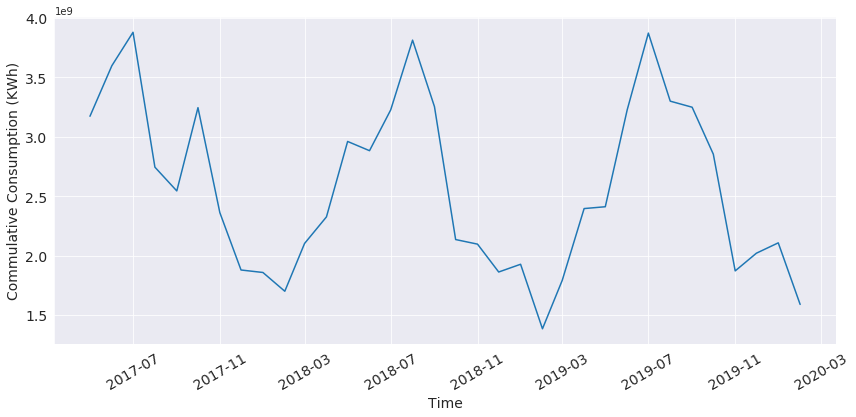

In [15]:
#plotting the overall consumption

f, axe = plt.subplots(1,1, figsize=(14,6))
sns.lineplot( x="calendar_month",y="consumption_unit_total", data=to_plot_overall, palette="Set3", ax=axe)
plt.xticks( fontsize=14, rotation=30)
plt.yticks( fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Commulative Consumption (KWh)", fontsize=14)
#plt.savefig('E:/OneDrive - Higher Education Commission/00DATA/000000000000000/research/summer internship 2020/paper/test.png')
#x_dates = dataset['calendar_month'].dt.strftime('%Y-%m').sort_values().unique()
#axe.set_xticklabels(labels=x_dates, rotation=45, ha='right')

In [16]:
to_plot_overall[["calendar_month","consumption_unit_total"]].to_csv("temp.csv")

Text(0.5,0,'Commulative Consumption (KWh)')

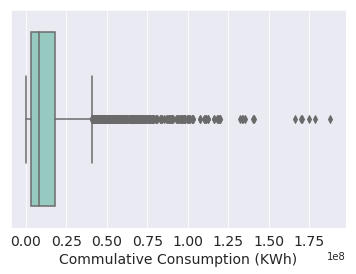

In [17]:


#dataset = dataset.dropna(how='any',axis=0)
dataset_original=dataset_original.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
#Inspecting the vaalues
ax = sns.boxplot(x=dataset_original["consumption_unit_total"],palette="Set3")
#Now, removing the extreme values
ax.set(xlabel="Electricity Consumption (KWh)")


plt.xticks( fontsize=14)
plt.yticks( fontsize=14)
plt.xlabel("Commulative Consumption (KWh)", fontsize=14)


Text(0.5,0,'Commulative Consumption (KWh)')

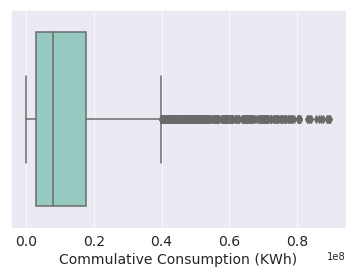

In [18]:
#Removing the uper and lower 5% values
#https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
q_low = dataset_original["consumption_unit_total"].quantile(0.01)
q_hi  = dataset_original["consumption_unit_total"].quantile(0.99)
q_hi
dataset_original = dataset_original[  ((dataset_original["consumption_unit_total"] < q_hi) & (dataset_original["consumption_unit_total"] > q_low) )]
ax = sns.boxplot(x=dataset_original["consumption_unit_total"],palette="Set3")
ax.set(xlabel="Electricity Consumption (KWh)")


plt.xticks( fontsize=14)
plt.yticks( fontsize=14)
plt.xlabel("Commulative Consumption (KWh)", fontsize=14)

[Text(0,0,'2017-05'),
 Text(0,0,'2017-06'),
 Text(0,0,'2017-07'),
 Text(0,0,'2017-08'),
 Text(0,0,'2017-09'),
 Text(0,0,'2017-10'),
 Text(0,0,'2017-11'),
 Text(0,0,'2017-12'),
 Text(0,0,'2018-01'),
 Text(0,0,'2018-02'),
 Text(0,0,'2018-03'),
 Text(0,0,'2018-04'),
 Text(0,0,'2018-05'),
 Text(0,0,'2018-06'),
 Text(0,0,'2018-07'),
 Text(0,0,'2018-08'),
 Text(0,0,'2018-09'),
 Text(0,0,'2018-10'),
 Text(0,0,'2018-11'),
 Text(0,0,'2018-12'),
 Text(0,0,'2019-01'),
 Text(0,0,'2019-02'),
 Text(0,0,'2019-03'),
 Text(0,0,'2019-04'),
 Text(0,0,'2019-05'),
 Text(0,0,'2019-06'),
 Text(0,0,'2019-07'),
 Text(0,0,'2019-08'),
 Text(0,0,'2019-09'),
 Text(0,0,'2019-10'),
 Text(0,0,'2019-11'),
 Text(0,0,'2019-12')]

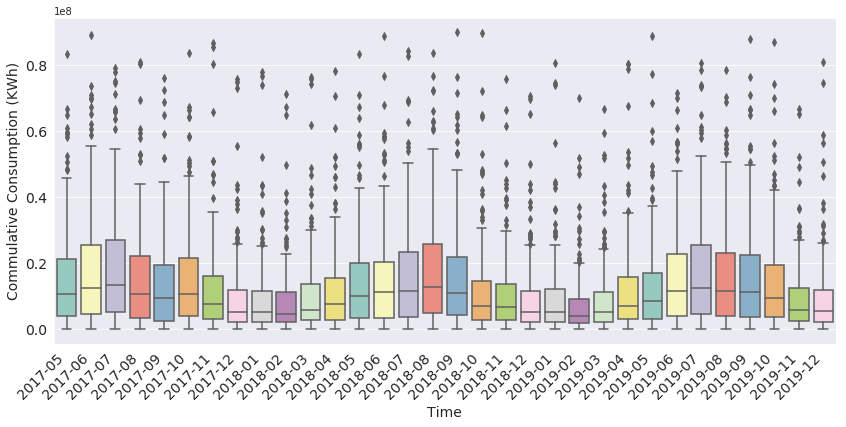

In [19]:
f, axe = plt.subplots(1,1, figsize=(14,6))
#sns.lineplot( x="calendar_month",y="consumption_unit_total", data=to_plot_overall, palette="Set3", ax=axe)



sns.boxplot(x="calendar_month", y="consumption_unit_total",
                 data=dataset_original, palette="Set3", ax=axe)
axe.set(xlabel="Calendar Month", ylabel="Electricity Consumption (KWh)")

plt.xticks( fontsize=14, rotation=30)
plt.yticks( fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Commulative Consumption (KWh)", fontsize=14)

x_dates = dataset_original['calendar_month'].dt.strftime('%Y-%m').sort_values().unique()
axe.set_xticklabels(labels=x_dates, rotation=45, ha='right')


In [20]:
to_plot_overall=dataset_original.copy()
to_plot_overall=to_plot_overall[["ID", "calendar_month", "consumption_unit_total"]]
to_plot_overall=to_plot_overall.groupby('calendar_month').sum().reset_index()
to_plot_overall[["calendar_month","consumption_unit_total"]].to_csv("temp.csv")

In [21]:
#Normlaizing the output now:
output_values=dataset_original["consumption_unit_total"]
dataset_original["consumption_unit_total"]=((output_values-output_values.min())/(output_values.max()-output_values.min()))
ax.set(xlabel="Calendar Month", ylabel="Electricity Consumption (KWh)")


[Text(-0.3,0.5,'Electricity Consumption (KWh)'),
 Text(0.5,21.2,'Calendar Month')]

In [22]:
to_plot_overall=dataset_original.copy()
to_plot_overall=to_plot_overall[["ID", "calendar_month", "consumption_unit_total"]]
to_plot_overall=to_plot_overall.groupby('calendar_month').sum().reset_index()
to_plot_overall[["calendar_month","consumption_unit_total"]].to_csv("temp.csv")

### <span id="5"></span> ** Visualizing Data **


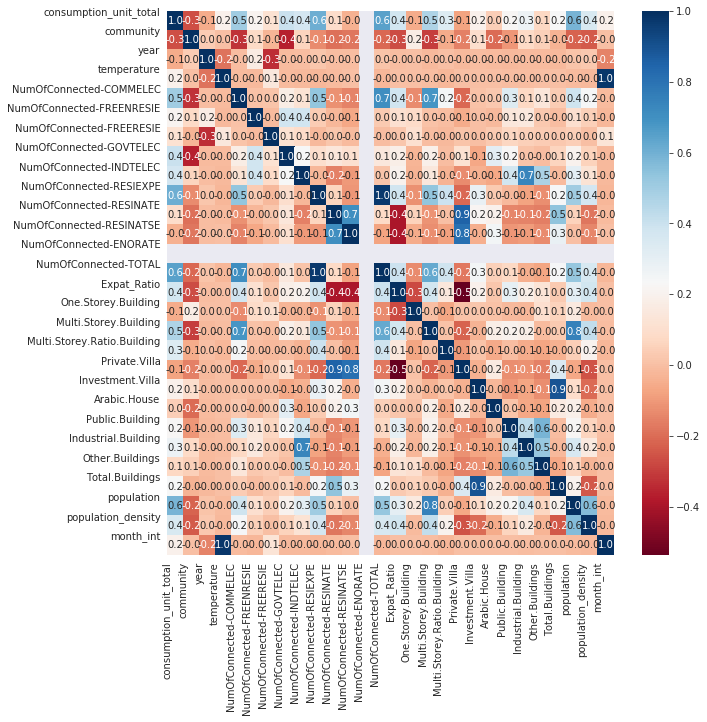

In [23]:
corr = dataset_original.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".1f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

## <span id="3"></span> ** . Feature selection using filter method **

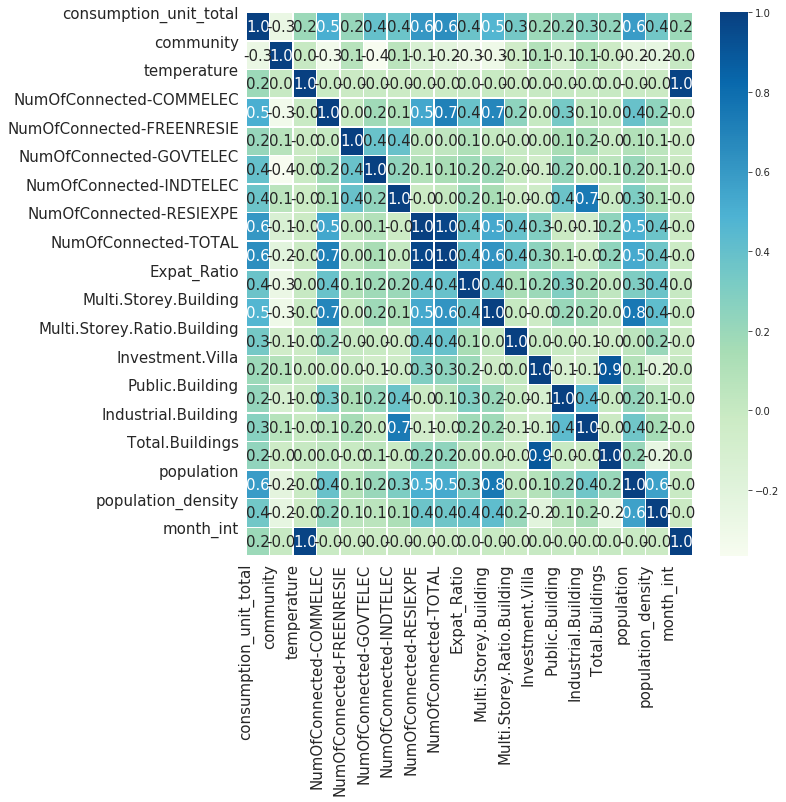

In [24]:
# reference: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#Correlation with output variable
cor_target = abs(corr["consumption_unit_total"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target.round(1)>=0.2].round(1)  # 0.2 is the threshold 
shortlisted=list(relevant_features.index)
#shortlisted.append("month_int")
#shortlisted=shortlisted+["Month_1","Month_2","Month_3","Month_4","Month_5","Month_6","Month_7","Month_8","Month_9","Month_10","Month_11","Month_12"]
#Now, filtering 
dataset=dataset_original[shortlisted].copy()

# Now drawing hte updated heatmap
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='GnBu', annot=True, fmt=".1f", linewidth=.5, annot_kws={'size':15})
#Apply xticks
colnames=shortlisted
plt.xticks(range(len(colnames)),colnames, fontsize=15);
#Apply yticks
plt.yticks(range(len(colnames)),colnames,fontsize=15)
#show plot
#legend(x="bottomright", legend=c("min", "ave", "max"))


plt.show()

In [25]:
corr["consumption_unit_total"]

consumption_unit_total         1.000000
community                     -0.265534
temperature                    0.193364
NumOfConnected-COMMELEC        0.507234
NumOfConnected-FREENRESIE      0.213263
NumOfConnected-GOVTELEC        0.400636
NumOfConnected-INDTELEC        0.372536
NumOfConnected-RESIEXPE        0.607185
NumOfConnected-TOTAL           0.648181
Expat_Ratio                    0.380563
Multi.Storey.Building          0.467810
Multi.Storey.Ratio.Building    0.338547
Investment.Villa               0.191299
Public.Building                0.222728
Industrial.Building            0.272733
Total.Buildings                0.233773
population                     0.587657
population_density             0.353604
month_int                      0.190521
Name: consumption_unit_total, dtype: float64

In [26]:
#dataset.to_csv("E:/OneDrive - Higher Education Commission/00DATA/000000000000000/research/summer internship 2020/reqData.csv", sep=',')


In [27]:
'''colnames=['Electricity Consumed', 'Calendar Month', 'Community', 'Year',
       'Temperature', 'Connected COMMELEC', 'Connected GOVTELEC',
       'Connected INDTELEC', 'Connected RESIEXPE',
       'Connected TOTAL', 'Expat Ratio', 'Multi Storey Buildings',
       'Multi Storey Ratio Building', 'Total Buildings', 'Population',
       'Population Density']'''

"colnames=['Electricity Consumed', 'Calendar Month', 'Community', 'Year',\n       'Temperature', 'Connected COMMELEC', 'Connected GOVTELEC',\n       'Connected INDTELEC', 'Connected RESIEXPE',\n       'Connected TOTAL', 'Expat Ratio', 'Multi Storey Buildings',\n       'Multi Storey Ratio Building', 'Total Buildings', 'Population',\n       'Population Density']"

In [28]:
len(colnames)

19

In [29]:
len(dataset.columns)

19

### <span id="4"></span> ** Data Preprocessing **

Are there missing values? There isn't any missing values as shown below.

In [30]:
 dataset.isnull().sum() # Just a Sanity Check 

consumption_unit_total         0
community                      0
temperature                    0
NumOfConnected-COMMELEC        0
NumOfConnected-FREENRESIE      0
NumOfConnected-GOVTELEC        0
NumOfConnected-INDTELEC        0
NumOfConnected-RESIEXPE        0
NumOfConnected-TOTAL           0
Expat_Ratio                    0
Multi.Storey.Building          0
Multi.Storey.Ratio.Building    0
Investment.Villa               0
Public.Building                0
Industrial.Building            0
Total.Buildings                0
population                     0
population_density             0
month_int                      0
dtype: int64

In [31]:
X = dataset.drop(["consumption_unit_total"], axis=1)
y = dataset[["consumption_unit_total"]].values.reshape(-1,1)


In [32]:
X

,community,temperature,NumOfConnected-COMMELEC,NumOfConnected-FREENRESIE,NumOfConnected-GOVTELEC,NumOfConnected-INDTELEC,NumOfConnected-RESIEXPE,NumOfConnected-TOTAL,Expat_Ratio,Multi.Storey.Building,Multi.Storey.Ratio.Building,Investment.Villa,Public.Building,Industrial.Building,Total.Buildings,population,population_density,month_int
208,112,33.7,3027,0,22,0,1060,4119,0.990654,204.0,0.0,0.0,185.0,0.0,401.0,6621.0,16.511222,1.500000
209,113,33.7,3191,0,4,0,1518,4719,0.996063,307.0,0.0,0.0,55.0,0.0,383.0,14963.0,39.067885,1.500000
210,114,33.7,3348,0,4,0,597,3950,0.998328,174.0,0.0,0.0,157.0,0.0,332.0,2563.0,7.719880,1.500000
211,115,33.7,1326,0,8,0,294,1628,1.000000,73.0,0.0,0.0,33.0,0.0,106.0,3750.0,35.377358,1.500000
212,116,33.7,2799,0,9,0,2422,5240,0.996298,250.0,0.0,0.0,20.0,0.0,281.0,18512.0,65.879004,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6953,945,23.6,1,1,1,0,0,11,0.000000,1.0,0.0,0.0,5.0,0.0,48.0,417.0,8.687500,0.133975
6954,951,23.6,15,3,2,0,3,35,0.200000,1.0,0.0,0.0,3.0,0.0,44.0,607.0,13.795455,0.133975
6955,961,23.6,31,2,11,0,3,99,0.054545,2.0,0.0,13.0,5.0,0.0,92.0,665.0,7.228261,0.133975
6956,967,23.6,7,0,1,0,0,12,0.000000,0.0,0.0,0.0,5.0,0.0,14.0,7.0,0.500000,0.133975


In [33]:
# Splitting the dataset into the Training set and Test set
## Here we have two ways, Either Go RANDOM or SEQUENTIAL SPLIT
from sklearn.model_selection import train_test_split
split_method="random"
if (split_method=="random"):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)
else:
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, shuffle=False)

In [34]:
",".join(list(X_train.columns))

'community,temperature,NumOfConnected-COMMELEC,NumOfConnected-FREENRESIE,NumOfConnected-GOVTELEC,NumOfConnected-INDTELEC,NumOfConnected-RESIEXPE,NumOfConnected-TOTAL,Expat_Ratio,Multi.Storey.Building,Multi.Storey.Ratio.Building,Investment.Villa,Public.Building,Industrial.Building,Total.Buildings,population,population_density,month_int'

In [35]:
X_train

,community,temperature,NumOfConnected-COMMELEC,NumOfConnected-FREENRESIE,NumOfConnected-GOVTELEC,NumOfConnected-INDTELEC,NumOfConnected-RESIEXPE,NumOfConnected-TOTAL,Expat_Ratio,Multi.Storey.Building,Multi.Storey.Ratio.Building,Investment.Villa,Public.Building,Industrial.Building,Total.Buildings,population,population_density,month_int
3740,115,32.1,1268,0,8,0,278,1554,1.000000,73.0,0.0,0.0,33.0,0.0,106.0,3861.0,36.424528,1.000000
1752,369,22.7,2339,2,20,86,190,2637,1.000000,124.0,0.0,0.0,125.0,56.0,761.0,38240.0,50.249671,0.133975
6353,336,32.7,684,8,11,0,3008,3768,0.981403,26.0,9.0,0.0,28.0,0.0,63.0,12218.0,193.936508,1.000000
221,126,33.7,189,0,30,0,1427,1998,0.802136,106.0,0.0,459.0,33.0,0.0,1438.0,15878.0,11.041725,1.500000
6903,675,23.6,301,0,4,0,1350,1672,0.987564,8.0,0.0,65.0,33.0,0.0,107.0,1523.0,14.233645,0.133975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,368,36.6,2543,0,20,124,88,2779,0.988764,66.0,0.0,0.0,136.0,31.0,671.0,23995.0,35.760060,1.866025
3741,116,32.1,2654,1,9,0,2428,5098,0.997535,250.0,0.0,0.0,20.0,0.0,281.0,18925.0,67.348754,1.000000
2866,684,34.0,67,3,6,0,2322,2473,0.968711,12.0,0.0,1604.0,6.0,0.0,1622.0,6753.0,4.163379,1.500000
598,813,36.6,9,0,5,0,0,17,0.000000,0.0,0.0,0.0,18.0,0.0,19.0,25.0,1.315789,1.866025


In [36]:

np.savetxt("X_train.csv", X_train, delimiter=",", header=",".join(list(X_train.columns)))
np.savetxt("y_train.csv",y_train , delimiter=",", header="consumption_unit_total")
np.savetxt("X_test.csv" ,X_test , delimiter=",", header=",".join(list(X_train.columns)))
np.savetxt("y_test.csv" ,y_test , delimiter=",", header="consumption_unit_total")


In [37]:
X_train

,community,temperature,NumOfConnected-COMMELEC,NumOfConnected-FREENRESIE,NumOfConnected-GOVTELEC,NumOfConnected-INDTELEC,NumOfConnected-RESIEXPE,NumOfConnected-TOTAL,Expat_Ratio,Multi.Storey.Building,Multi.Storey.Ratio.Building,Investment.Villa,Public.Building,Industrial.Building,Total.Buildings,population,population_density,month_int
3740,115,32.1,1268,0,8,0,278,1554,1.000000,73.0,0.0,0.0,33.0,0.0,106.0,3861.0,36.424528,1.000000
1752,369,22.7,2339,2,20,86,190,2637,1.000000,124.0,0.0,0.0,125.0,56.0,761.0,38240.0,50.249671,0.133975
6353,336,32.7,684,8,11,0,3008,3768,0.981403,26.0,9.0,0.0,28.0,0.0,63.0,12218.0,193.936508,1.000000
221,126,33.7,189,0,30,0,1427,1998,0.802136,106.0,0.0,459.0,33.0,0.0,1438.0,15878.0,11.041725,1.500000
6903,675,23.6,301,0,4,0,1350,1672,0.987564,8.0,0.0,65.0,33.0,0.0,107.0,1523.0,14.233645,0.133975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,368,36.6,2543,0,20,124,88,2779,0.988764,66.0,0.0,0.0,136.0,31.0,671.0,23995.0,35.760060,1.866025
3741,116,32.1,2654,1,9,0,2428,5098,0.997535,250.0,0.0,0.0,20.0,0.0,281.0,18925.0,67.348754,1.000000
2866,684,34.0,67,3,6,0,2322,2473,0.968711,12.0,0.0,1604.0,6.0,0.0,1622.0,6753.0,4.163379,1.500000
598,813,36.6,9,0,5,0,0,17,0.000000,0.0,0.0,0.0,18.0,0.0,19.0,25.0,1.315789,1.866025


In [38]:
len(X_train.columns)

18

In [39]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (3955, 18)
Shape of X_test:  (1695, 18)
Shape of y_train:  (3955, 1)
Shape of y_test (1695, 1)


In [40]:

# Feature Scaling
# Feature Scaling
#https://chrisalbon.com/python/data_wrangling/pandas_normalize_column/
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# sc_X.fit(X_train)
# sc_y.fit(y_train)
# X_scaled = sc_X.transform(X_train)
# y_scaled = sc_y.transform(y_train).reshape(-1,1)



# mm_X = MinMaxScaler()
# mm_y = MinMaxScaler()
# mm_X.fit(X_train)
# mm_y.fit(y_train)
# X_scaled = mm_X.transform(X_train)
# y_scaled = mm_y.transform(y_train).reshape(-1,1)



#df_normalized = pd.DataFrame(x_scaled)

## <span id="6"></span> ** 4. Regression Models **

### <span id="7"></span> ** Linear Regression **

In [41]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
start = timeit.default_timer() ##
regressor_linear.fit(X_train, y_train)
stop = timeit.default_timer() ##
time_linear=(stop - start)*1000 ##

In [42]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear =  (np.sqrt(mean_squared_error(y_test,y_pred_linear_test)))

print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

mae_linear = mean_absolute_error(y_test,y_pred_linear_test)
med_ae_linear = median_absolute_error(y_test,y_pred_linear_test)
print("MAE: ", mae_linear)
print("MAE: ", med_ae_linear)

CV:  0.7163012884661482
R2_score (train):  0.7244951407232859
R2_score (test):  0.7400031382524477
RMSE:  0.08692771447170572
MAE:  0.05541498376408042
MAE:  0.03572335239565304


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

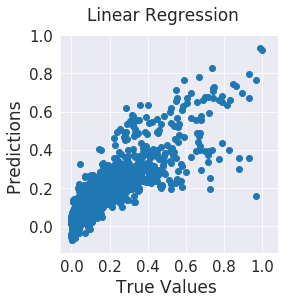

In [43]:

plt.scatter(y_test, y_pred_linear_test)
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle('Linear Regression', fontsize=17)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)

#### Trying ROLLING CROSS VALIDAITON  -https://www.kaggle.com/kashnitsky/correct-time-aware-cross-validation-scheme

cv_linear

[(el[0].shape, el[1].shape) for el in time_split.split(X)]

In [44]:
#?////////////////////////////////////////////////////////////////////////////////////////////////

### <span id="9"></span> ** Ridge Regression **

In [45]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
start = timeit.default_timer() ##
ridge_pipe.fit(X_train, y_train)
stop = timeit.default_timer() ##
time_ridge=(stop - start)*1000 ##

In [46]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge =  (np.sqrt(mean_squared_error(y_test,y_pred_ridge_test)))

print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

mae_ridge = mean_absolute_error(y_test,y_pred_ridge_test)
med_ae_ridge = median_absolute_error(y_test,y_pred_ridge_test)
print("MAE: ", mae_ridge)
print("MAE: ", med_ae_ridge)

CV:  0.7992507288015787
R2_score (train):  0.9014394528693398
R2_score (test):  0.8655543324674746
RMSE:  0.06250972871457085
MAE:  0.034443623924225286
MAE:  0.023012504371914266


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <a list of 7 Text yticklabel objects>)

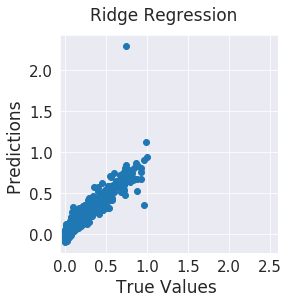

In [47]:
plt.scatter(y_test, y_pred_ridge_test)
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle('Ridge Regression', fontsize=17)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)

### <span id="10"></span> ** Lasso Regression **

In [48]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
start = timeit.default_timer() ##
lasso_pipe.fit(X_train, y_train)
stop = timeit.default_timer() ##
time_lasso=(stop - start)*1000 ##

In [49]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso =  (np.sqrt(mean_squared_error(y_test,y_pred_lasso_test)))

print("CV: ", cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

mae_lasso = mean_absolute_error(y_test,y_pred_lasso_test)
med_ae_lasso = median_absolute_error(y_test,y_pred_lasso_test)
print("MAE: ", mae_lasso)
print("MAE: ", med_ae_lasso)

CV:  0.7222597849930809
R2_score (train):  0.7324462516631336
R2_score (test):  0.7498213746207413
RMSE:  0.0852705980985727
MAE:  0.0540486778789917
MAE:  0.0359243909293852


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

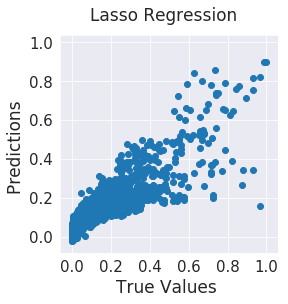

In [50]:
plt.scatter(y_test, y_pred_lasso_test)
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle('Lasso Regression', fontsize=17)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)

### <span id="11"></span> ** Support Vector Regression **

In [51]:
# Fitting the SVR Model to the dataset
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf',degree=3,C=1.5, epsilon=0.1, gamma=1e-7)
start = timeit.default_timer() ##
regressor_svr.fit(X_train, y_train.ravel())
stop = timeit.default_timer() ##
time_svr=(stop - start)*1000 ##

In [52]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_svr = cross_val_score(estimator = regressor_svr, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_svr_train = (regressor_svr.predict((X_train)))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

# Predicting R2 Score the Test set results
y_pred_svr_test = (regressor_svr.predict((X_test)))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)


# Predicting RMSE the Test set results
rmse_svr =  (np.sqrt(mean_squared_error(y_test,y_pred_svr_test)))

print("CV: ", cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)

mae_svr = mean_absolute_error(y_test,y_pred_svr_test)
med_ae_svr = median_absolute_error(y_test,y_pred_svr_test)
print("MAE: ", mae_svr)
print("MAE: ", med_ae_svr)

CV:  0.7538934854421351
R2_score (train):  0.8002014296013746
R2_score (test):  0.7730026022892225
RMSE:  0.08122405129905425
MAE:  0.06446190172332183
MAE:  0.05785503630404033


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

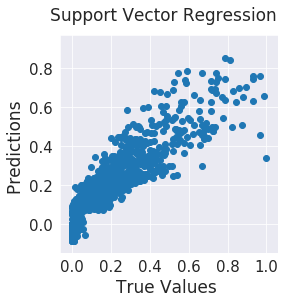

In [53]:
plt.scatter(y_test, y_pred_svr_test)
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle('Support Vector Regression', fontsize=17)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)

### <span id="12"></span> ** Decision Tree Regression **

In [54]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
start = timeit.default_timer() ##
regressor_dt.fit(X_train, y_train)
stop = timeit.default_timer() ##
time_dt=(stop - start)*1000 ##

In [55]:

from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt =  (np.sqrt(mean_squared_error(y_test,y_pred_dt_test)))

print("CV: ", cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

mae_dt = mean_absolute_error(y_test,y_pred_dt_test)
med_ae_dt = median_absolute_error(y_test,y_pred_dt_test)
print("MAE: ", mae_dt)
print("MAE: ", med_ae_dt)

CV:  0.8662092333794241
R2_score (train):  1.0
R2_score (test):  0.8946790207128216
RMSE:  0.05532630320897124
MAE:  0.027892060358641863
MAE:  0.010945501850256192


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

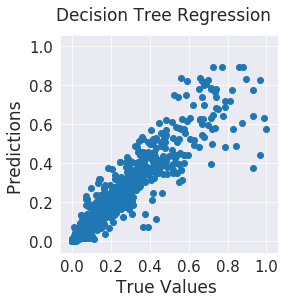

In [56]:
plt.scatter(y_test, y_pred_dt_test)
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle('Decision Tree Regression', fontsize=17)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)

### <span id="13"></span> ** Random Forest Regression **

In [57]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 200, random_state = 0)
start = timeit.default_timer() ##
regressor_rf.fit(X_train, y_train.ravel())
stop = timeit.default_timer() ##
time_rf=(stop - start)*1000 ##

In [58]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

mae_rf = mean_absolute_error(y_test, y_pred_rf_test)
med_ae_rf = median_absolute_error(y_test, y_pred_rf_test)
print("MAE: ", mae_rf)
print("MAE: ", med_ae_rf)


CV:  0.92737877285346
R2_score (train):  0.9903368633839729
R2_score (test):  0.946402558145862
RMSE:  0.039468101746802785
MAE:  0.019078145410023464
MAE:  0.006330238148839998


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

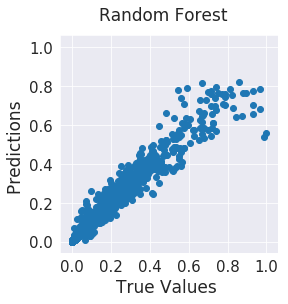

In [59]:
plt.scatter(y_test, y_pred_rf_test)
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle('Random Forest', fontsize=17)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)

In [60]:
#Scaling for neural Network
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
sc_X.fit(X_train)
#sc_y.fit(y_train)
X_scaled_train = sc_X.transform(X_train)
X_scaled_test = sc_X.transform(X_test)
#y_scaled = sc_y.transform(y_train).reshape(-1,1)


# Fitting the Random Forest Regression to the dataset

from sklearn.neural_network import MLPRegressor
regressor_nn =MLPRegressor(alpha=0.0005, random_state=1, max_iter=2000, verbose=False, hidden_layer_sizes=(100,50,50), n_iter_no_change=20)
start = timeit.default_timer() ##
regressor_nn.fit(X_scaled_train, y_train.ravel())
stop = timeit.default_timer() ##
time_nn=(stop - start)*1000 ##

from sklearn.metrics import r2_score


# Predicting Cross Validation Score
cv_nn = cross_val_score(estimator = regressor_nn, X = X_scaled_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_nn_train = regressor_nn.predict(X_scaled_train)
r2_score_nn_train = r2_score(y_train, y_pred_nn_train)

# Predicting R2 Score the Test set results
y_pred_nn_test = regressor_nn.predict(X_scaled_test)
r2_score_nn_test = r2_score(y_test, y_pred_nn_test)

# Predicting RMSE the Test set results
rmse_nn = (np.sqrt(mean_squared_error(y_test, y_pred_nn_test)))
print('CV: ', cv_nn.mean())
print('R2_score (train): ', r2_score_nn_train)
print('R2_score (test): ', r2_score_nn_test)
print("RMSE: ", rmse_nn)

mae_nn = mean_absolute_error(y_test, y_pred_nn_test)
med_ae_nn = median_absolute_error(y_test, y_pred_nn_test)
print("MAE: ", mae_nn)
print("MAE: ", med_ae_nn)
   # regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

CV:  0.9241053491228357
R2_score (train):  0.9499444680370437
R2_score (test):  0.9487928965576988
RMSE:  0.03857796488413134
MAE:  0.024417641611474156
MAE:  0.015015980958409766


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

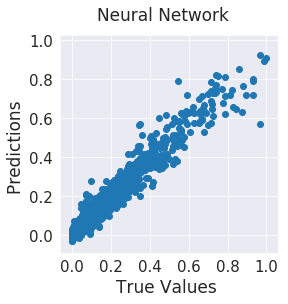

In [61]:
plt.scatter(y_test, y_pred_nn_test)
plt.xlabel('True Values ', fontsize=17)
plt.ylabel('Predictions ', fontsize=17)
plt.axis('equal')
plt.axis('square')
plt.suptitle('Neural Network', fontsize=17)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)

## <span id="14"></span> ** 5. Measuring the Error **

In [62]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean(),mae_linear, med_ae_linear, time_linear),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean(),mae_ridge, med_ae_ridge,time_ridge),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean(),mae_lasso, med_ae_lasso, time_lasso),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean(),mae_svr, med_ae_svr, time_svr),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean(),mae_dt, med_ae_dt, time_dt),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean(),mae_rf, med_ae_rf, time_rf),
          ('Neural Network', rmse_nn, r2_score_nn_train, r2_score_nn_test, cv_nn.mean(),mae_nn, med_ae_nn, time_nn)
         ]

In [63]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation', 'Mean Absolute Error (Normalized)', 'Median Absolute Error (Normalized)', 'Time Taken (ms)'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation,Mean Absolute Error (Normalized),Median Absolute Error (Normalized),Time Taken (ms)
0,Linear Regression,0.086928,0.724495,0.740003,0.716301,0.055415,0.035723,4.179348
1,Ridge Regression,0.062510,0.901439,0.865554,0.799251,0.034444,0.023013,47.504411
2,Lasso Regression,0.085271,0.732446,0.749821,0.722260,0.054049,0.035924,81.378651
3,Support Vector Regression,0.081224,0.800201,0.773003,0.753893,0.064462,0.057855,327.104003
4,Decision Tree Regression,0.055326,1.000000,0.894679,0.866209,0.027892,0.010946,41.562055
5,Random Forest Regression,0.039468,0.990337,0.946403,0.927379,0.019078,0.006330,5304.590491
6,Neural Network,0.038578,0.949944,0.948793,0.924105,0.024418,0.015016,1408.359518


In [64]:
#Writing the data to a file
predict.sort_values(['RMSE']).to_csv("random_all_models WO - WO .csv", sep=',')


In [65]:
df = pd.DataFrame(y_test, columns = ["y_test"])
df["y_pred_linear_test"] = y_pred_linear_test
df["y_pred_ridge_test"] = y_pred_ridge_test
df["y_pred_lasso_test"] = y_pred_lasso_test
df["y_pred_svr_test"] = y_pred_svr_test
df["y_pred_dt_test"] = y_pred_dt_test
df["y_pred_rf_test"] = y_pred_rf_test
df["y_pred_nn_test"] = y_pred_nn_test
df.to_csv("Random_allModels_Ytest_Ypredict.csv")

### <span id="15"></span> ** Varying Train Test Ratio **

In [66]:
all_results=pd.DataFrame()

In [67]:
X

,community,temperature,NumOfConnected-COMMELEC,NumOfConnected-FREENRESIE,NumOfConnected-GOVTELEC,NumOfConnected-INDTELEC,NumOfConnected-RESIEXPE,NumOfConnected-TOTAL,Expat_Ratio,Multi.Storey.Building,Multi.Storey.Ratio.Building,Investment.Villa,Public.Building,Industrial.Building,Total.Buildings,population,population_density,month_int
208,112,33.7,3027,0,22,0,1060,4119,0.990654,204.0,0.0,0.0,185.0,0.0,401.0,6621.0,16.511222,1.500000
209,113,33.7,3191,0,4,0,1518,4719,0.996063,307.0,0.0,0.0,55.0,0.0,383.0,14963.0,39.067885,1.500000
210,114,33.7,3348,0,4,0,597,3950,0.998328,174.0,0.0,0.0,157.0,0.0,332.0,2563.0,7.719880,1.500000
211,115,33.7,1326,0,8,0,294,1628,1.000000,73.0,0.0,0.0,33.0,0.0,106.0,3750.0,35.377358,1.500000
212,116,33.7,2799,0,9,0,2422,5240,0.996298,250.0,0.0,0.0,20.0,0.0,281.0,18512.0,65.879004,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6953,945,23.6,1,1,1,0,0,11,0.000000,1.0,0.0,0.0,5.0,0.0,48.0,417.0,8.687500,0.133975
6954,951,23.6,15,3,2,0,3,35,0.200000,1.0,0.0,0.0,3.0,0.0,44.0,607.0,13.795455,0.133975
6955,961,23.6,31,2,11,0,3,99,0.054545,2.0,0.0,13.0,5.0,0.0,92.0,665.0,7.228261,0.133975
6956,967,23.6,7,0,1,0,0,12,0.000000,0.0,0.0,0.0,5.0,0.0,14.0,7.0,0.500000,0.133975


In [68]:
# Fitting the Random Forest Regression to the dataset

for test_size in [10,20,30,40,50,60,70]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size/100.0, shuffle = False)
    from sklearn.ensemble import RandomForestRegressor
    regressor_rf = RandomForestRegressor(n_estimators = 200, random_state = 0)
    start = timeit.default_timer() ##
    regressor_rf.fit(X_train, y_train.ravel())
    stop = timeit.default_timer() ##
    time_rf=(stop - start)*1000 ##

    from sklearn.metrics import r2_score

    # Predicting Cross Validation Score
    cv_rf = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train.ravel(), cv = 10)

    # Predicting R2 Score the Train set results
    y_pred_rf_train = regressor_rf.predict(X_train)
    r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

    # Predicting R2 Score the Test set results
    y_pred_rf_test = regressor_rf.predict(X_test)
    r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

    # Predicting RMSE the Test set results
    rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
    print('CV: ', cv_rf.mean())
    print('R2_score (train): ', r2_score_rf_train)
    print('R2_score (test): ', r2_score_rf_test)
    print("RMSE: ", rmse_rf)

    mae_rf = mean_absolute_error(y_test, y_pred_rf_test)
    med_ae_rf = median_absolute_error(y_test, y_pred_rf_test)
    print("MAE: ", mae_rf)
    print("MAE: ", med_ae_rf)
    one_results=pd.DataFrame([["Random Forest", test_size  , rmse_rf, r2_score_rf_train,
                               r2_score_rf_test, cv_rf.mean(),mae_rf, med_ae_rf, time_rf]], 
                             columns=['Model',"Test Data Ratio" ,'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation', 'Mean Absolute Error (Normalized)', 'Median Absolute Error (Normalized)', 'Time Taken (ms)'])
    all_results=pd.concat([all_results, one_results])


CV:  0.9282509214681246
R2_score (train):  0.9922603359111946
R2_score (test):  0.8683828484651817
RMSE:  0.05270570734218827
MAE:  0.026500610671128487
MAE:  0.011698871673330904
CV:  0.9180111123989102
R2_score (train):  0.991734135910465
R2_score (test):  0.9284290271087507
RMSE:  0.045507801209689155
MAE:  0.024583443873540455
MAE:  0.011317732547567896
CV:  0.9207416991674868
R2_score (train):  0.9914485545260403
R2_score (test):  0.9329117935075769
RMSE:  0.04368824107403968
MAE:  0.022580645084698456
MAE:  0.009561346283341807
CV:  0.9288560126108292
R2_score (train):  0.9919144505403569
R2_score (test):  0.9301652930263682
RMSE:  0.04260970706634397
MAE:  0.021824659663582362
MAE:  0.009324782333816173
CV:  0.9313408079179275
R2_score (train):  0.9926070568658812
R2_score (test):  0.9103258613436129
RMSE:  0.04829855818225867
MAE:  0.02465883780769142
MAE:  0.00983236172674895
CV:  0.9220508507606467
R2_score (train):  0.9923673857169533
R2_score (test):  0.9169764612094001
RMS

In [69]:
for test_size in [10,20,30,40,50,60,70]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size/100.0,  shuffle = False)
 
    start = timeit.default_timer() ##
    regressor_linear.fit(X_train, y_train)
    stop = timeit.default_timer() ##
    time_linear=(stop - start)*1000 ##
    
    # Predicting R2 Score the Train set results
    y_pred_linear_train = regressor_linear.predict(X_train)
    r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

    # Predicting R2 Score the Test set results
    y_pred_linear_test = regressor_linear.predict(X_test)
    r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

    # Predicting RMSE the Test set results
    rmse_linear =  (np.sqrt(mean_squared_error(y_test,y_pred_linear_test)))
    r2_score_linear_train = r2_score(y_train, y_pred_linear_train)
    r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

    cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train.ravel(), cv = 10).mean()
    mae_linear = mean_absolute_error(y_test, y_pred_linear_test)
    med_ae_linear = median_absolute_error(y_test, y_pred_linear_test) 
    
    one_results=pd.DataFrame([["Linear Model", test_size  , rmse_linear, r2_score_linear_train, 
                               r2_score_linear_test, cv_linear.mean(),mae_linear, med_ae_linear, time_linear]], 
                             columns=['Model',"Test Data Ratio" ,'RMSE', 'R2_Score(training)',
                                      'R2_Score(test)', 'Cross-Validation', 
                                      'Mean Absolute Error (Normalized)', 
                                      'Median Absolute Error (Normalized)', 'Time Taken (ms)'])
    all_results=pd.concat([all_results, one_results])   
    
    print(one_results)

          Model  Test Data Ratio     RMSE  R2_Score(training)  R2_Score(test)  \
0  Linear Model               10  0.07515            0.728166        0.732421   

   Cross-Validation  Mean Absolute Error (Normalized)  \
0          0.694327                          0.048955   

   Median Absolute Error (Normalized)  Time Taken (ms)  
0                             0.03209         4.158235  
          Model  Test Data Ratio      RMSE  R2_Score(training)  \
0  Linear Model               20  0.085581            0.724876   

   R2_Score(test)  Cross-Validation  Mean Absolute Error (Normalized)  \
0        0.746886          0.688804                          0.053969   

   Median Absolute Error (Normalized)  Time Taken (ms)  
0                            0.035893         3.287298  
          Model  Test Data Ratio      RMSE  R2_Score(training)  \
0  Linear Model               30  0.083474            0.718281   

   R2_Score(test)  Cross-Validation  Mean Absolute Error (Normalized)  \
0       

In [70]:
for test_size in [10,20,30,40,50,60,70]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size/100.0, shuffle = False)

    regressor_svr = SVR(kernel = 'rbf',degree=3,C=1.5, epsilon=0.1, gamma=1e-7)
    start = timeit.default_timer() ##
    regressor_svr.fit(X_train, y_train.ravel())
    stop = timeit.default_timer() ##
    time_svr=(stop - start)*1000 ##    
        # Predicting Cross Validation Score
    

    # Predicting R2 Score the Train set results
    y_pred_svr_train = (regressor_svr.predict((X_train)))
    r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

    # Predicting R2 Score the Test set results
    y_pred_svr_test = (regressor_svr.predict((X_test)))
    r2_score_svr_test = r2_score(y_test, y_pred_svr_test)


    # Predicting RMSE the Test set results
    rmse_svr =  (np.sqrt(mean_squared_error(y_test,y_pred_svr_test)))
    r2_score_svr_train = r2_score(y_train, y_pred_svr_train)
    r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

    cv_svr = cross_val_score(estimator = regressor_svr, X = X_train, y = y_train.ravel(), cv = 10).mean()
    mae_svr = mean_absolute_error(y_test, y_pred_svr_test)
    med_ae_svr = median_absolute_error(y_test, y_pred_svr_test)

    
    one_results=pd.DataFrame([["SVR Model", test_size  , rmse_svr, r2_score_svr_train, 
                               r2_score_svr_test, cv_svr.mean(),mae_svr, med_ae_svr, time_svr]], 
                             columns=['Model',"Test Data Ratio" ,'RMSE', 'R2_Score(training)',
                                      'R2_Score(test)', 'Cross-Validation', 
                                      'Mean Absolute Error (Normalized)', 
                                      'Median Absolute Error (Normalized)', 'Time Taken (ms)'])
    all_results=pd.concat([all_results, one_results])   
    
    print(one_results)

       Model  Test Data Ratio      RMSE  R2_Score(training)  R2_Score(test)  \
0  SVR Model               10  0.090633            0.809201        0.610804   

   Cross-Validation  Mean Absolute Error (Normalized)  \
0          0.711644                           0.07161   

   Median Absolute Error (Normalized)  Time Taken (ms)  
0                            0.066476       484.157736  
       Model  Test Data Ratio      RMSE  R2_Score(training)  R2_Score(test)  \
0  SVR Model               20  0.093122             0.80985        0.700309   

   Cross-Validation  Mean Absolute Error (Normalized)  \
0          0.722801                          0.068636   

   Median Absolute Error (Normalized)  Time Taken (ms)  
0                            0.059549       382.857211  
       Model  Test Data Ratio      RMSE  R2_Score(training)  R2_Score(test)  \
0  SVR Model               30  0.097429            0.807291        0.666346   

   Cross-Validation  Mean Absolute Error (Normalized)  \
0       

In [71]:
for test_size in [10,20,30,40,50,60,70]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size/100.0,  shuffle = False)
     
    steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
    ]
    ridge_pipe = Pipeline(steps)
    start = timeit.default_timer() ##
    ridge_pipe.fit(X_train, y_train)
    stop = timeit.default_timer() ##
    time_ridge=(stop - start)*1000 ##

    
    # Predicting R2 Score the Test set results
    y_pred_ridge_train = ridge_pipe.predict(X_train)
    r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

    # Predicting R2 Score the Test set results
    y_pred_ridge_test = ridge_pipe.predict(X_test)
    r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

    # Predicting RMSE the Test set results
    rmse_ridge =  (np.sqrt(mean_squared_error(y_test,y_pred_ridge_test)))
    r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)
    r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

    cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10).mean()
    mae_ridge = mean_absolute_error(y_test, y_pred_ridge_test)
    med_ae_ridge = median_absolute_error(y_test, y_pred_ridge_test)    
    
    one_results=pd.DataFrame([["Ridge Model", test_size  , rmse_ridge, r2_score_ridge_train, 
                               r2_score_ridge_test, cv_ridge.mean(),mae_ridge, med_ae_ridge, time_ridge]], 
                             columns=['Model',"Test Data Ratio" ,'RMSE', 'R2_Score(training)',
                                      'R2_Score(test)', 'Cross-Validation', 
                                      'Mean Absolute Error (Normalized)', 
                                      'Median Absolute Error (Normalized)', 'Time Taken (ms)'])
    all_results=pd.concat([all_results, one_results])   
    
    print(one_results)

         Model  Test Data Ratio      RMSE  R2_Score(training)  R2_Score(test)  \
0  Ridge Model               10  0.137285            0.913265        0.107018   

   Cross-Validation  Mean Absolute Error (Normalized)  \
0          0.887477                          0.056831   

   Median Absolute Error (Normalized)  Time Taken (ms)  
0                            0.029353        28.061021  
         Model  Test Data Ratio      RMSE  R2_Score(training)  R2_Score(test)  \
0  Ridge Model               20  0.101719            0.913792        0.642423   

   Cross-Validation  Mean Absolute Error (Normalized)  \
0          0.886289                          0.049844   

   Median Absolute Error (Normalized)  Time Taken (ms)  
0                            0.028697        62.149146  
         Model  Test Data Ratio      RMSE  R2_Score(training)  R2_Score(test)  \
0  Ridge Model               30  0.088701            0.911462        0.723448   

   Cross-Validation  Mean Absolute Error (Normalized)

In [72]:
for test_size in [10,20,30,40,50,60,70]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size/100.0, shuffle = False)

    steps = [
        ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
    ]

    lasso_pipe = Pipeline(steps)
    start = timeit.default_timer() ##
    lasso_pipe.fit(X_train, y_train)
    stop = timeit.default_timer() ##
    time_lasso=(stop - start)*1000 ##
    
    

    # Predicting R2 Score the Test set results
    y_pred_lasso_train = lasso_pipe.predict(X_train)
    r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

    # Predicting R2 Score the Test set results
    y_pred_lasso_test = lasso_pipe.predict(X_test)
    r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

    # Predicting RMSE the Test set results
    rmse_lasso =  (np.sqrt(mean_squared_error(y_test,y_pred_lasso_test)))
    r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)
    r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)
    

    # Predicting Cross Validation Score

    cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train.ravel(), cv = 10).mean()
    mae_lasso = mean_absolute_error(y_test, y_pred_lasso_test)
    med_ae_lasso = median_absolute_error(y_test, y_pred_lasso_test)
    

    
    one_results=pd.DataFrame([["lasso Model", test_size  , rmse_lasso, r2_score_lasso_train, 
                               r2_score_lasso_test, cv_lasso.mean(),mae_lasso, med_ae_lasso, time_lasso]], 
                             columns=['Model',"Test Data Ratio" ,'RMSE', 'R2_Score(training)',
                                      'R2_Score(test)', 'Cross-Validation', 
                                      'Mean Absolute Error (Normalized)', 
                                      'Median Absolute Error (Normalized)', 'Time Taken (ms)'])
    all_results=pd.concat([all_results, one_results])    
    
    print(one_results)

         Model  Test Data Ratio      RMSE  R2_Score(training)  R2_Score(test)  \
0  lasso Model               10  0.074442            0.737264         0.73744   

   Cross-Validation  Mean Absolute Error (Normalized)  \
0          0.717125                          0.049121   

   Median Absolute Error (Normalized)  Time Taken (ms)  
0                            0.034039        85.850369  
         Model  Test Data Ratio      RMSE  R2_Score(training)  R2_Score(test)  \
0  lasso Model               20  0.090375            0.735682        0.717734   

   Cross-Validation  Mean Absolute Error (Normalized)  \
0          0.713029                          0.055706   

   Median Absolute Error (Normalized)  Time Taken (ms)  
0                            0.036146        81.209591  
         Model  Test Data Ratio      RMSE  R2_Score(training)  R2_Score(test)  \
0  lasso Model               30  0.086678            0.733948        0.735923   

   Cross-Validation  Mean Absolute Error (Normalized)

In [73]:
# Fitting the Neural Network to the dataset

for test_size in [10,20,30,40,50,60,70]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size/100.0,  shuffle = False)
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    sc_X.fit(X_train)
    #sc_y.fit(y_train)
    X_scaled_train = sc_X.transform(X_train)
    X_scaled_test = sc_X.transform(X_test)
    #y_scaled = sc_y.transform(y_train).reshape(-1,1)


    # Fitting the Random Forest Regression to the dataset

    from sklearn.neural_network import MLPRegressor
    regressor_nn =MLPRegressor(alpha=0.0005, random_state=1, max_iter=2000, verbose=False, hidden_layer_sizes=(100,50,50), n_iter_no_change=20)
    start = timeit.default_timer() ##
    regressor_nn.fit(X_scaled_train, y_train.ravel())
    stop = timeit.default_timer() ##
    time_nn=(stop - start)*1000 ##

    from sklearn.metrics import r2_score


    # Predicting Cross Validation Score
    cv_nn = cross_val_score(estimator = regressor_nn, X = X_scaled_train, y = y_train.ravel(), cv = 10)

    # Predicting R2 Score the Train set results
    y_pred_nn_train = regressor_nn.predict(X_scaled_train)
    r2_score_nn_train = r2_score(y_train, y_pred_nn_train)

    # Predicting R2 Score the Test set results
    y_pred_nn_test = regressor_nn.predict(X_scaled_test)
    r2_score_nn_test = r2_score(y_test, y_pred_nn_test)

    # Predicting RMSE the Test set results
    rmse_nn = (np.sqrt(mean_squared_error(y_test, y_pred_nn_test)))
    print('CV: ', cv_nn.mean())
    print('R2_score (train): ', r2_score_nn_train)
    print('R2_score (test): ', r2_score_nn_test)
    print("RMSE: ", rmse_nn)

    mae_nn = mean_absolute_error(y_test, y_pred_nn_test)
    med_ae_nn = median_absolute_error(y_test, y_pred_nn_test)
    print("MAE: ", mae_nn)
    print("MAE: ", med_ae_nn)
    one_results=pd.DataFrame([["Artificial Neural Network", test_size  , rmse_nn,
                               r2_score_nn_train, r2_score_nn_test, cv_nn.mean(),mae_nn, 
                               med_ae_nn, time_nn]], 
                             columns=['Model',"Test Data Ratio" ,'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation', 'Mean Absolute Error (Normalized)', 'Median Absolute Error (Normalized)', 'Time Taken (ms)'])
    all_results=pd.concat([all_results, one_results])

CV:  0.927775483077934
R2_score (train):  0.9517592540423483
R2_score (test):  0.850862483023157
RMSE:  0.056104133139128966
MAE:  0.0333306349494955
MAE:  0.018764730388519207
CV:  0.9204167792888077
R2_score (train):  0.9511560102656812
R2_score (test):  0.904949575074921
RMSE:  0.0524438326988916
MAE:  0.030016710054914384
MAE:  0.01629187029209312
CV:  0.92270762925891
R2_score (train):  0.9492909072466649
R2_score (test):  0.9194419517809069
RMSE:  0.04787358346976365
MAE:  0.028710239655976463
MAE:  0.01726783912290758
CV:  0.9292021898232414
R2_score (train):  0.9543018958438174
R2_score (test):  0.9095233803530635
RMSE:  0.048499925787341816
MAE:  0.02818806251657968
MAE:  0.016492070154195158
CV:  0.9133770953558118
R2_score (train):  0.9500454261045664
R2_score (test):  0.8964918170063302
RMSE:  0.05189050554564623
MAE:  0.03010131173497459
MAE:  0.018622493774513502
CV:  0.901682807990908
R2_score (train):  0.9494713493165341
R2_score (test):  0.9126906868258525
RMSE:  0.049

In [74]:
# Fitting the Decision Tree to the dataset

for test_size in [10,20,30,40,50,60,70]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size/100.0,  shuffle = False)
    from sklearn.tree import DecisionTreeRegressor
    regressor_dt = DecisionTreeRegressor(random_state = 0)
    start = timeit.default_timer() ##
    regressor_dt.fit(X_train, y_train)
    stop = timeit.default_timer() ##
    time_dt=(stop - start)*1000 ##

    from sklearn.metrics import r2_score

   
    # Predicting Cross Validation Score
    cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

    # Predicting R2 Score the Train set results
    y_pred_dt_train = regressor_dt.predict(X_train)
    r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

    # Predicting R2 Score the Test set results
    y_pred_dt_test = regressor_dt.predict(X_test)
    r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

    # Predicting RMSE the Test set results
    rmse_dt =  (np.sqrt(mean_squared_error(y_test,y_pred_dt_test)))

    print("CV: ", cv_dt.mean())
    print('R2_score (train): ', r2_score_dt_train)
    print('R2_score (test): ', r2_score_dt_test)
    print("RMSE: ", rmse_dt)

    mae_dt = mean_absolute_error(y_test,y_pred_dt_test)
    med_ae_dt = median_absolute_error(y_test,y_pred_dt_test)
    print("MAE: ", mae_dt)
    print("MAE: ", med_ae_dt)
    one_results=pd.DataFrame([["Decision Tree", test_size  , rmse_dt, r2_score_dt_train,
                               r2_score_dt_test, cv_dt.mean(),mae_dt, med_ae_dt, time_dt]], 
                             columns=['Model',"Test Data Ratio" ,'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation', 'Mean Absolute Error (Normalized)', 'Median Absolute Error (Normalized)', 'Time Taken (ms)'])
    all_results=pd.concat([all_results, one_results])

CV:  0.8747512375376758
R2_score (train):  0.9999999983809538
R2_score (test):  0.6666561992633857
RMSE:  0.08387790871087702
MAE:  0.037266152567705636
MAE:  0.014771541362392282
CV:  0.8503428811709576
R2_score (train):  0.9999999981241972
R2_score (test):  0.8741838616106208
RMSE:  0.06033725767800332
MAE:  0.03128672558890436
MAE:  0.01354131769689356
CV:  0.8691798348739681
R2_score (train):  0.9999999978666595
R2_score (test):  0.8504665930951274
RMSE:  0.0652244736643893
MAE:  0.0331584376727719
MAE:  0.013036190542113024
CV:  0.8756827364230402
R2_score (train):  0.9999999976398678
R2_score (test):  0.8743937832816221
RMSE:  0.05714502911419181
MAE:  0.029115174516015564
MAE:  0.011800502804650602
CV:  0.8922096452381874
R2_score (train):  0.9999999972348168
R2_score (test):  0.8369264088028602
RMSE:  0.06513169448211076
MAE:  0.03138794935712004
MAE:  0.011520967690214268
CV:  0.8771245457816498
R2_score (train):  0.9999999963879392
R2_score (test):  0.8677158514811185
RMSE:  

In [75]:
all_results

,Model,Test Data Ratio,RMSE,R2_Score(training),R2_Score(test),Cross-Validation,Mean Absolute Error (Normalized),Median Absolute Error (Normalized),Time Taken (ms)
0,Random Forest,10,0.052706,0.992260,0.868383,0.928251,0.026501,0.011699,6518.237069
0,Random Forest,20,0.045508,0.991734,0.928429,0.918011,0.024583,0.011318,5795.849294
0,Random Forest,30,0.043688,0.991449,0.932912,0.920742,0.022581,0.009561,4979.380584
0,Random Forest,40,0.042610,0.991914,0.930165,0.928856,0.021825,0.009325,4165.547642
0,Random Forest,50,0.048299,0.992607,0.910326,0.931341,0.024659,0.009832,3459.247276
0,Random Forest,60,0.048098,0.992367,0.916976,0.922051,0.025202,0.011073,2818.656341
0,Random Forest,70,0.051318,0.990221,0.904733,0.911729,0.028983,0.013560,2093.323140
0,Linear Model,10,0.075150,0.728166,0.732421,0.694327,0.048955,0.032090,4.158235
0,Linear Model,20,0.085581,0.724876,0.746886,0.688804,0.053969,0.035893,3.287298
0,Linear Model,30,0.083474,0.718281,0.755081,0.681757,0.053194,0.035812,34.817296


In [76]:
##Visualising
all_results=all_results.reset_index()
all_results.style.format('{:.6f}')

all_results.to_csv("REALODEREDDATA_diff_ratio_train_test.csv", sep=',')



### <span id="15"></span> ** Visualizing Model Performance **

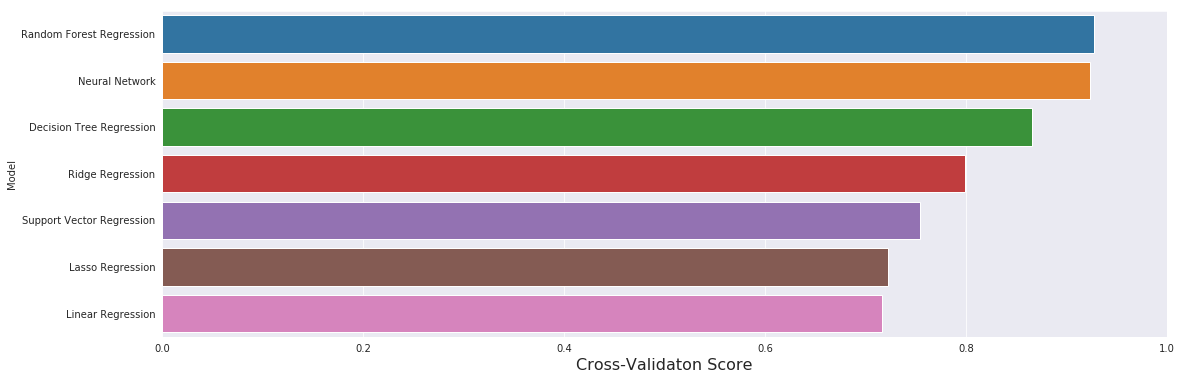

In [77]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

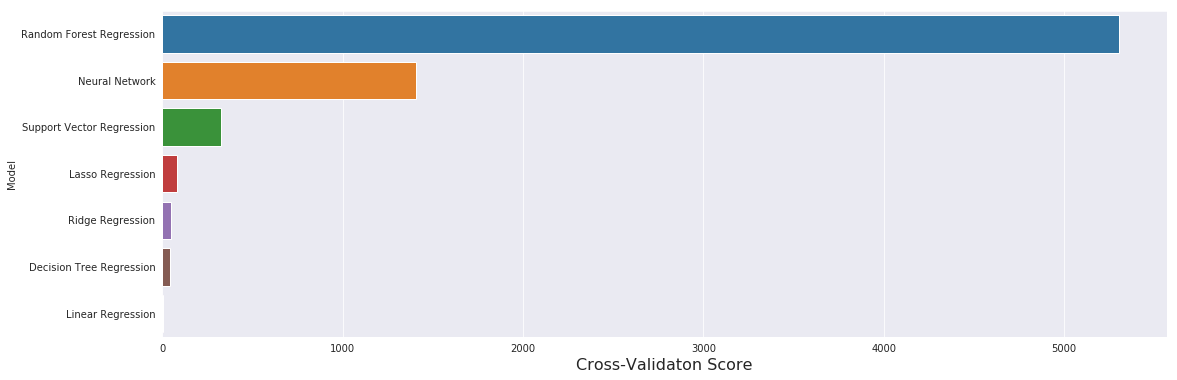

In [78]:
#Plotting the timing
f, axe = plt.subplots(1,1, figsize=(18,6))
predict.sort_values(by=['Time Taken (ms)'], ascending=False, inplace=True)
sns.barplot(x='Time Taken (ms)', y='Model', data = predict, ax = axe)
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
#axe.set_xlim(0,1.0)
plt.show()

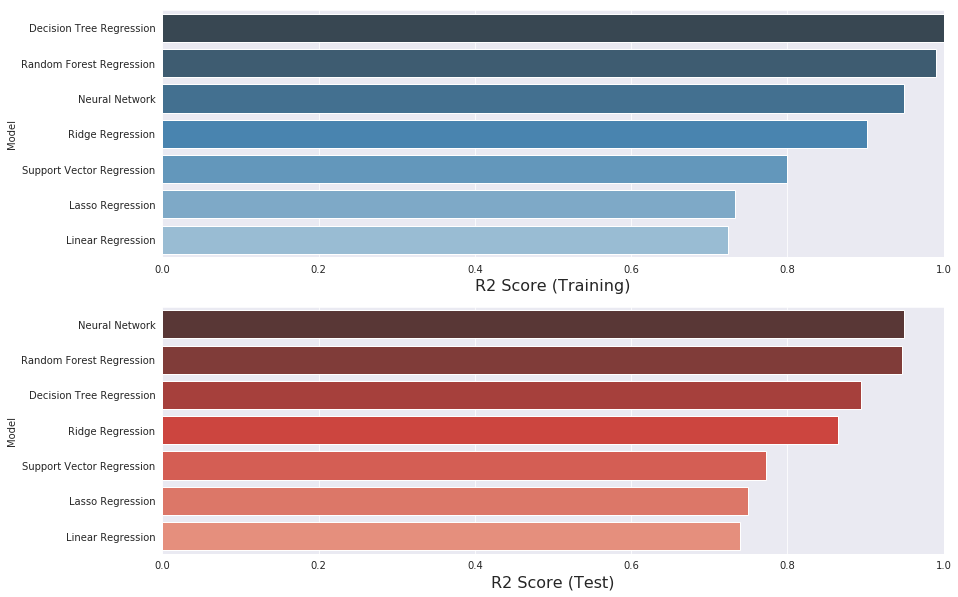

In [79]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

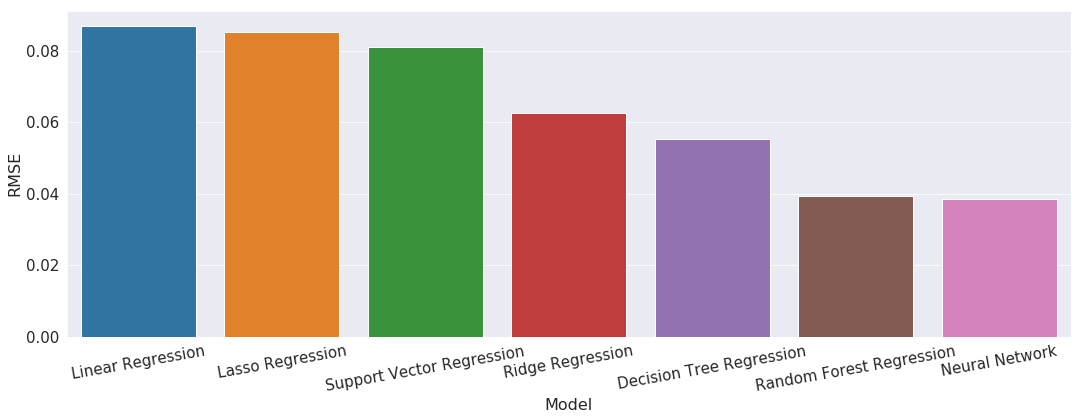

In [80]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)
plt.xticks( fontsize=15, rotation=10)
plt.yticks( fontsize=15)
plt.show()

In [81]:
### <span id="15"></span> ** Calculating the time complexity **


# Self-Learning 

In [82]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.001, random_state = 25)


In [83]:
shortlisted_sl=shortlisted+['calendar_month']
dataset_sl=dataset_original[shortlisted_sl]   
unique_months=dataset_sl['calendar_month'].unique()

In [84]:
unique_months

array(['2017-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2019-03-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2019-06-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2019-08-01

In [85]:
shortlisted_sl

['consumption_unit_total',
 'community',
 'temperature',
 'NumOfConnected-COMMELEC',
 'NumOfConnected-FREENRESIE',
 'NumOfConnected-GOVTELEC',
 'NumOfConnected-INDTELEC',
 'NumOfConnected-RESIEXPE',
 'NumOfConnected-TOTAL',
 'Expat_Ratio',
 'Multi.Storey.Building',
 'Multi.Storey.Ratio.Building',
 'Investment.Villa',
 'Public.Building',
 'Industrial.Building',
 'Total.Buildings',
 'population',
 'population_density',
 'month_int',
 'calendar_month']

In [86]:
dataset_original[shortlisted_sl][(
    (dataset_original[shortlisted_sl]['calendar_month']>= dataset_original[shortlisted_sl]['calendar_month'].unique()[0])
    &
    (dataset_original[shortlisted_sl]['calendar_month']> dataset_original[shortlisted_sl]['calendar_month'].unique()[2])                                 )]

,consumption_unit_total,community,temperature,NumOfConnected-COMMELEC,NumOfConnected-FREENRESIE,NumOfConnected-GOVTELEC,NumOfConnected-INDTELEC,NumOfConnected-RESIEXPE,NumOfConnected-TOTAL,Expat_Ratio,Multi.Storey.Building,Multi.Storey.Ratio.Building,Investment.Villa,Public.Building,Industrial.Building,Total.Buildings,population,population_density,month_int,calendar_month
826,0.081677,112,38.2,3025,0,22,0,1061,4118,0.990663,204.0,0.0,0.0,185.0,0.0,401.0,6621.0,16.511222,1.866025,2017-08-01
827,0.105627,113,38.2,3187,0,4,0,1501,4698,0.996019,307.0,0.0,0.0,55.0,0.0,383.0,14963.0,39.067885,1.866025,2017-08-01
828,0.076778,114,38.2,3347,0,4,0,593,3947,0.994966,174.0,0.0,0.0,157.0,0.0,332.0,2563.0,7.719880,1.866025,2017-08-01
829,0.043314,115,38.2,1334,0,8,0,298,1640,1.000000,73.0,0.0,0.0,33.0,0.0,106.0,3750.0,35.377358,1.866025,2017-08-01
830,0.120594,116,38.2,2784,0,9,0,2427,5230,0.996305,250.0,0.0,0.0,20.0,0.0,281.0,18512.0,65.879004,1.866025,2017-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6953,0.000153,945,23.6,1,1,1,0,0,11,0.000000,1.0,0.0,0.0,5.0,0.0,48.0,417.0,8.687500,0.133975,2019-12-01
6954,0.005033,951,23.6,15,3,2,0,3,35,0.200000,1.0,0.0,0.0,3.0,0.0,44.0,607.0,13.795455,0.133975,2019-12-01
6955,0.070173,961,23.6,31,2,11,0,3,99,0.054545,2.0,0.0,13.0,5.0,0.0,92.0,665.0,7.228261,0.133975,2019-12-01
6956,0.000759,967,23.6,7,0,1,0,0,12,0.000000,0.0,0.0,0.0,5.0,0.0,14.0,7.0,0.500000,0.133975,2019-12-01


In [87]:
#dataset_sl [(dataset_sl.calendar_month>= train_from) & (dataset_sl.calendar_month<= train_till)]
      

In [88]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

shortlisted_sl=shortlisted+['calendar_month']
dataset_sl=dataset_original[shortlisted_sl]   
unique_months=dataset_sl['calendar_month'].unique()
all_res_rmse=pd.DataFrame(columns=["Month Used for Testing", "numberOFmonth",  "Random Forest"])
all_res_train=pd.DataFrame(columns=["Month Used for Testing", "numberOFmonth",  "Random Forest"])
all_res_test=pd.DataFrame(columns=["Month Used for Testing", "numberOFmonth",  "Random Forest"])
all_res_cv=pd.DataFrame(columns=["Month Used for Testing", "numberOFmonth",  "Random Forest"])
all_res_mae=pd.DataFrame(columns=["Month Used for Testing", "numberOFmonth",  "Random Forest"])
all_res_med_ae=pd.DataFrame(columns=["Month Used for Testing", "numberOFmonth",  "Random Forest"])
    ##FOR MODEL # 1 ########################random forest#############################
    
    #Choose between moving and rolling
    
moving =True

##FOR MODEL # 1 ########################random forest#############################
#for till_month_num in range(13,len(unique_months)-1):
for numberOFmonth in range(0, 13): #addthis big loop
    for till_month_num in range(numberOFmonth,len(unique_months)-1):
        train_till=unique_months[till_month_num]
        train_from=unique_months[till_month_num-numberOFmonth] #addthis trainfrom
        test_this=unique_months[till_month_num+1]
        
        print("Training Till: "+ str(train_till))
        print("Testing for: "+ str(test_this))
        if moving==True:
            for_training=dataset_sl [(dataset_sl.calendar_month>= train_from) & (dataset_sl.calendar_month<= train_till)]
        else: #12 month Moving
            for_training=dataset_sl [dataset_sl.calendar_month<= train_till]
        print
        print(for_training['calendar_month'].unique())

       # for_testing=dataset_sl [(dataset_sl.calendar_month>= test_this) & (dataset_sl.calendar_month<= test_this_till ) ]
        for_testing=dataset_sl [(dataset_sl.calendar_month== test_this) ]

        X_train=for_training.drop(["consumption_unit_total", "calendar_month"], axis=1)
        y_train=for_training[["consumption_unit_total"]].values.reshape(-1,1)

        ##Randomizing the training
        #X_train, X_test_JUNK, y_train, y_test_JUNK = train_test_split(X_train, y_train, test_size = 0.001, random_state = 25)
        ##

        X_test=for_testing.drop(["consumption_unit_total", "calendar_month"], axis=1)
        y_test=for_testing[["consumption_unit_total"]].values.reshape(-1,1)

        ## Now, this is where we fit the models and get results. 
        # Fitting the  Regression Model to the dataset
        from sklearn.tree import DecisionTreeRegressor
        regressor_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
        regressor_rf.fit(X_train, y_train.ravel())
      # Predicting R2 Score the Train set results
        y_pred_rf_train = regressor_rf.predict(X_train)
        r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

        # Predicting R2 Score the Test set results
        y_pred_rf_test = regressor_rf.predict(X_test)
        r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

        # Predicting RMSE the Test set results
        rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
        #print('CV: ', cv_rf.mean())
        r2_score_rf_train = r2_score(y_train, y_pred_rf_train)
        r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

        cv_rf = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train.ravel(), cv = 10).mean()
        mae_rf = mean_absolute_error(y_test, y_pred_rf_test)
        med_ae_rf = median_absolute_error(y_test, y_pred_rf_test)


      ##FOR MODEL # 2 ###################decision trees############################################


        ## Now, this is where we fit the models and get results. 
        # Fitting the Decision Tree Regression Model to the dataset
        from sklearn.tree import DecisionTreeRegressor
        regressor_dt = DecisionTreeRegressor(random_state = 0)
        regressor_dt.fit(X_train, y_train)

        ##
        y_pred_dt_train = regressor_dt.predict(X_train)
        r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

        # Predicting R2 Score the Test set results
        y_pred_dt_test = regressor_dt.predict(X_test)
        r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

        # Predicting RMSE the Test set results
        rmse_dt =  (np.sqrt(mean_squared_error(y_test,y_pred_dt_test)))
        r2_score_dt_train = r2_score(y_train, y_pred_dt_train)
        r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

        cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train.ravel(), cv = 10).mean()
        mae_dt = mean_absolute_error(y_test, y_pred_dt_test)
        med_ae_dt = median_absolute_error(y_test, y_pred_dt_test)




         ##FOR MODEL # 3 ###################neural network############################################



        #Scaling for neural Network
        from sklearn.preprocessing import StandardScaler, MinMaxScaler
        sc_X = StandardScaler()
        sc_y = StandardScaler()
        sc_X.fit(X_train)
        X_scaled_train = sc_X.transform(X_train)
        X_scaled_test = sc_X.transform(X_test)
        from sklearn.neural_network import MLPRegressor
        regressor_nn =MLPRegressor(alpha=0.005, random_state=1, max_iter=2000, verbose=False, hidden_layer_sizes=(100,50,50), n_iter_no_change=20)
        regressor_nn.fit(X_scaled_train, y_train.ravel())
        from sklearn.metrics import r2_score

        # Predicting R2 Score the Train set results
        y_pred_nn_train = regressor_nn.predict(X_scaled_train)
        r2_score_nn_train = r2_score(y_train, y_pred_nn_train)

        # Predicting R2 Score the Test set results
        y_pred_nn_test = regressor_nn.predict(X_scaled_test)
        r2_score_nn_test = r2_score(y_test, y_pred_nn_test)

        # Predicting RMSE the Test set results
        rmse_nn = (np.sqrt(mean_squared_error(y_test, y_pred_nn_test)))

        r2_score_nn_train = r2_score(y_train, y_pred_nn_train)
        r2_score_nn_test = r2_score(y_test, y_pred_nn_test)

        cv_nn = cross_val_score(estimator = regressor_nn, X = X_scaled_train, y = y_train.ravel(), cv = 10).mean()

        mae_nn = mean_absolute_error(y_test, y_pred_nn_test)
        med_ae_nn = median_absolute_error(y_test, y_pred_nn_test)


        ##FOR MODEL # 4 ###################Linear Regression############################################


        ## Now, this is where we fit the models and get results. 
        # Fitting the Decision Tree Regression Model to the dataset
        from sklearn.linear_model import LinearRegression
        from sklearn.tree import DecisionTreeRegressor
        regressor_linear = LinearRegression()
        regressor_linear.fit(X_train, y_train)


        # Predicting R2 Score the Train set results
        y_pred_linear_train = regressor_linear.predict(X_train)
        r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

        # Predicting R2 Score the Test set results
        y_pred_linear_test = regressor_linear.predict(X_test)
        r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

        # Predicting RMSE the Test set results
        rmse_linear =  (np.sqrt(mean_squared_error(y_test,y_pred_linear_test)))
        r2_score_linear_train = r2_score(y_train, y_pred_linear_train)
        r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

        cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train.ravel(), cv = 10).mean()
        mae_linear = mean_absolute_error(y_test, y_pred_linear_test)
        med_ae_linear = median_absolute_error(y_test, y_pred_linear_test)

        ##FOR MODEL # 5 ###################Ridge Regression ############################################

        steps = [
        ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge(alpha=3.8, fit_intercept=True))
        ]
        ridge_pipe = Pipeline(steps)
        ridge_pipe.fit(X_train, y_train)


        # Predicting R2 Score the Test set results
        y_pred_ridge_train = ridge_pipe.predict(X_train)
        r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

        # Predicting R2 Score the Test set results
        y_pred_ridge_test = ridge_pipe.predict(X_test)
        r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

        # Predicting RMSE the Test set results
        rmse_ridge =  (np.sqrt(mean_squared_error(y_test,y_pred_ridge_test)))
        r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)
        r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

        cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10).mean()
        mae_ridge = mean_absolute_error(y_test, y_pred_ridge_test)
        med_ae_ridge = median_absolute_error(y_test, y_pred_ridge_test)

        ##FOR MODEL # 6 ###################Lasso Regression ############################################

        steps = [
            ('scalar', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2)),
            ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
        ]

        lasso_pipe = Pipeline(steps)
        start = timeit.default_timer() ##
        lasso_pipe.fit(X_train, y_train)

        # Predicting Cross Validation Score


        # Predicting R2 Score the Test set results
        y_pred_lasso_train = lasso_pipe.predict(X_train)
        r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

        # Predicting R2 Score the Test set results
        y_pred_lasso_test = lasso_pipe.predict(X_test)
        r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

        # Predicting RMSE the Test set results
        rmse_lasso =  (np.sqrt(mean_squared_error(y_test,y_pred_lasso_test)))
        r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)
        r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

        cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train.ravel(), cv = 10).mean()
        mae_lasso = mean_absolute_error(y_test, y_pred_lasso_test)
        med_ae_lasso = median_absolute_error(y_test, y_pred_lasso_test)

       ##FOR MODEL # 7 ###################Support Vector Regression ############################################
        regressor_svr = SVR(kernel = 'rbf',degree=3,C=1.5, epsilon=0.1, gamma=1e-7)
        regressor_svr.fit(X_train, y_train.ravel())

            # Predicting Cross Validation Score


        # Predicting R2 Score the Train set results
        y_pred_svr_train = (regressor_svr.predict((X_train)))
        r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

        # Predicting R2 Score the Test set results
        y_pred_svr_test = (regressor_svr.predict((X_test)))
        r2_score_svr_test = r2_score(y_test, y_pred_svr_test)


        # Predicting RMSE the Test set results
        rmse_svr =  (np.sqrt(mean_squared_error(y_test,y_pred_svr_test)))
        r2_score_svr_train = r2_score(y_train, y_pred_svr_train)
        r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

        cv_svr = cross_val_score(estimator = regressor_svr, X = X_train, y = y_train.ravel(), cv = 10).mean()
        mae_svr = mean_absolute_error(y_test, y_pred_svr_test)
        med_ae_svr = median_absolute_error(y_test, y_pred_svr_test)

        print("....................................")
        one_res_rmse={"Month Used for Testing":test_this,"numberOFmonth":numberOFmonth, "Random Forest": rmse_rf , "Decision Tree": rmse_dt, "Neural Network":rmse_nn, "Linear Regression":rmse_linear, "Ridge Regression":rmse_ridge, "Lasso Regression":rmse_lasso, "Support Vector Regression":rmse_svr  }
        one_res_r2_train={"Month Used for Testing":test_this,"numberOFmonth":numberOFmonth, "Random Forest": r2_score_rf_train , "Decision Tree": r2_score_dt_train, "Neural Network":r2_score_nn_train, "Linear Regression":r2_score_linear_train, "Ridge Regression":r2_score_ridge_train, "Lasso Regression":r2_score_lasso_train, "Support Vector Regression":r2_score_svr_train  }
        one_res_r2_test={"Month Used for Testing":test_this,"numberOFmonth":numberOFmonth, "Random Forest": r2_score_rf_test , "Decision Tree": r2_score_dt_test, "Neural Network":r2_score_nn_test, "Linear Regression":r2_score_linear_test, "Ridge Regression":r2_score_ridge_test, "Lasso Regression":r2_score_lasso_test, "Support Vector Regression":r2_score_svr_test  }
        one_res_cv={"Month Used for Testing":test_this,"numberOFmonth":numberOFmonth, "Random Forest": cv_rf , "Decision Tree": cv_dt, "Neural Network":cv_nn, "Linear Regression":cv_linear, "Ridge Regression":cv_ridge, "Lasso Regression":cv_lasso, "Support Vector Regression":cv_svr  }
        one_res_mae={"Month Used for Testing":test_this,"numberOFmonth":numberOFmonth, "Random Forest": mae_rf , "Decision Tree": mae_dt, "Neural Network":mae_nn, "Linear Regression":mae_linear, "Ridge Regression":mae_ridge, "Lasso Regression":mae_lasso, "Support Vector Regression":mae_svr  }
        one_res_med_ae={"Month Used for Testing":test_this,"numberOFmonth":numberOFmonth, "Random Forest": med_ae_rf , "Decision Tree": med_ae_dt, "Neural Network":med_ae_nn, "Linear Regression":med_ae_linear, "Ridge Regression":med_ae_ridge, "Lasso Regression":med_ae_lasso, "Support Vector Regression":med_ae_svr  }



        all_res_rmse=all_res_rmse.append(one_res_rmse,ignore_index=True)
        all_res_train=all_res_train.append(one_res_r2_train,ignore_index=True)
        all_res_test=all_res_test.append(one_res_r2_test,ignore_index=True)
        all_res_cv=all_res_cv.append(one_res_cv,ignore_index=True)
        all_res_mae=all_res_mae.append(one_res_mae,ignore_index=True)
        all_res_med_ae=all_res_med_ae.append(one_res_med_ae,ignore_index=True)
    
    
#for_training

Training Till: 2017-05-01T00:00:00.000000000
Testing for: 2017-06-01T00:00:00.000000000
['2017-05-01T00:00:00.000000000']
....................................
Training Till: 2017-06-01T00:00:00.000000000
Testing for: 2017-07-01T00:00:00.000000000
['2017-06-01T00:00:00.000000000']
....................................
Training Till: 2017-07-01T00:00:00.000000000
Testing for: 2017-08-01T00:00:00.000000000
['2017-07-01T00:00:00.000000000']
....................................
Training Till: 2017-08-01T00:00:00.000000000
Testing for: 2017-09-01T00:00:00.000000000
['2017-08-01T00:00:00.000000000']
....................................
Training Till: 2017-09-01T00:00:00.000000000
Testing for: 2017-10-01T00:00:00.000000000
['2017-09-01T00:00:00.000000000']
....................................
Training Till: 2017-10-01T00:00:00.000000000
Testing for: 2017-11-01T00:00:00.000000000
['2017-10-01T00:00:00.000000000']
....................................
Training Till: 2017-11-01T00:00:00.000000000
T

....................................
Training Till: 2018-12-01T00:00:00.000000000
Testing for: 2019-01-01T00:00:00.000000000
['2018-11-01T00:00:00.000000000' '2018-12-01T00:00:00.000000000']
....................................
Training Till: 2019-01-01T00:00:00.000000000
Testing for: 2019-02-01T00:00:00.000000000
['2018-12-01T00:00:00.000000000' '2019-01-01T00:00:00.000000000']
....................................
Training Till: 2019-02-01T00:00:00.000000000
Testing for: 2019-03-01T00:00:00.000000000
['2019-01-01T00:00:00.000000000' '2019-02-01T00:00:00.000000000']
....................................
Training Till: 2019-03-01T00:00:00.000000000
Testing for: 2019-04-01T00:00:00.000000000
['2019-02-01T00:00:00.000000000' '2019-03-01T00:00:00.000000000']
....................................
Training Till: 2019-04-01T00:00:00.000000000
Testing for: 2019-05-01T00:00:00.000000000
['2019-03-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000']
....................................
Training

....................................
Training Till: 2019-10-01T00:00:00.000000000
Testing for: 2019-11-01T00:00:00.000000000
['2019-08-01T00:00:00.000000000' '2019-09-01T00:00:00.000000000'
 '2019-10-01T00:00:00.000000000']
....................................
Training Till: 2019-11-01T00:00:00.000000000
Testing for: 2019-12-01T00:00:00.000000000
['2019-09-01T00:00:00.000000000' '2019-10-01T00:00:00.000000000'
 '2019-11-01T00:00:00.000000000']
....................................
Training Till: 2017-08-01T00:00:00.000000000
Testing for: 2017-09-01T00:00:00.000000000
['2017-05-01T00:00:00.000000000' '2017-06-01T00:00:00.000000000'
 '2017-07-01T00:00:00.000000000' '2017-08-01T00:00:00.000000000']
....................................
Training Till: 2017-09-01T00:00:00.000000000
Testing for: 2017-10-01T00:00:00.000000000
['2017-06-01T00:00:00.000000000' '2017-07-01T00:00:00.000000000'
 '2017-08-01T00:00:00.000000000' '2017-09-01T00:00:00.000000000']
....................................
Tra

....................................
Training Till: 2017-11-01T00:00:00.000000000
Testing for: 2017-12-01T00:00:00.000000000
['2017-07-01T00:00:00.000000000' '2017-08-01T00:00:00.000000000'
 '2017-09-01T00:00:00.000000000' '2017-10-01T00:00:00.000000000'
 '2017-11-01T00:00:00.000000000']
....................................
Training Till: 2017-12-01T00:00:00.000000000
Testing for: 2018-01-01T00:00:00.000000000
['2017-08-01T00:00:00.000000000' '2017-09-01T00:00:00.000000000'
 '2017-10-01T00:00:00.000000000' '2017-11-01T00:00:00.000000000'
 '2017-12-01T00:00:00.000000000']
....................................
Training Till: 2018-01-01T00:00:00.000000000
Testing for: 2018-02-01T00:00:00.000000000
['2017-09-01T00:00:00.000000000' '2017-10-01T00:00:00.000000000'
 '2017-11-01T00:00:00.000000000' '2017-12-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000']
....................................
Training Till: 2018-02-01T00:00:00.000000000
Testing for: 2018-03-01T00:00:00.000000000
['2017-1

....................................
Training Till: 2018-02-01T00:00:00.000000000
Testing for: 2018-03-01T00:00:00.000000000
['2017-09-01T00:00:00.000000000' '2017-10-01T00:00:00.000000000'
 '2017-11-01T00:00:00.000000000' '2017-12-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2018-02-01T00:00:00.000000000']
....................................
Training Till: 2018-03-01T00:00:00.000000000
Testing for: 2018-04-01T00:00:00.000000000
['2017-10-01T00:00:00.000000000' '2017-11-01T00:00:00.000000000'
 '2017-12-01T00:00:00.000000000' '2018-01-01T00:00:00.000000000'
 '2018-02-01T00:00:00.000000000' '2018-03-01T00:00:00.000000000']
....................................
Training Till: 2018-04-01T00:00:00.000000000
Testing for: 2018-05-01T00:00:00.000000000
['2017-11-01T00:00:00.000000000' '2017-12-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2018-02-01T00:00:00.000000000'
 '2018-03-01T00:00:00.000000000' '2018-04-01T00:00:00.000000000']
....................................


....................................
Training Till: 2018-03-01T00:00:00.000000000
Testing for: 2018-04-01T00:00:00.000000000
['2017-09-01T00:00:00.000000000' '2017-10-01T00:00:00.000000000'
 '2017-11-01T00:00:00.000000000' '2017-12-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2018-02-01T00:00:00.000000000'
 '2018-03-01T00:00:00.000000000']
....................................
Training Till: 2018-04-01T00:00:00.000000000
Testing for: 2018-05-01T00:00:00.000000000
['2017-10-01T00:00:00.000000000' '2017-11-01T00:00:00.000000000'
 '2017-12-01T00:00:00.000000000' '2018-01-01T00:00:00.000000000'
 '2018-02-01T00:00:00.000000000' '2018-03-01T00:00:00.000000000'
 '2018-04-01T00:00:00.000000000']
....................................
Training Till: 2018-05-01T00:00:00.000000000
Testing for: 2018-06-01T00:00:00.000000000
['2017-11-01T00:00:00.000000000' '2017-12-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2018-02-01T00:00:00.000000000'
 '2018-03-01T00:00:00.000000000' '201

....................................
Training Till: 2018-02-01T00:00:00.000000000
Testing for: 2018-03-01T00:00:00.000000000
['2017-07-01T00:00:00.000000000' '2017-08-01T00:00:00.000000000'
 '2017-09-01T00:00:00.000000000' '2017-10-01T00:00:00.000000000'
 '2017-11-01T00:00:00.000000000' '2017-12-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2018-02-01T00:00:00.000000000']
....................................
Training Till: 2018-03-01T00:00:00.000000000
Testing for: 2018-04-01T00:00:00.000000000
['2017-08-01T00:00:00.000000000' '2017-09-01T00:00:00.000000000'
 '2017-10-01T00:00:00.000000000' '2017-11-01T00:00:00.000000000'
 '2017-12-01T00:00:00.000000000' '2018-01-01T00:00:00.000000000'
 '2018-02-01T00:00:00.000000000' '2018-03-01T00:00:00.000000000']
....................................
Training Till: 2018-04-01T00:00:00.000000000
Testing for: 2018-05-01T00:00:00.000000000
['2017-09-01T00:00:00.000000000' '2017-10-01T00:00:00.000000000'
 '2017-11-01T00:00:00.000000000' '2017

....................................
Training Till: 2018-01-01T00:00:00.000000000
Testing for: 2018-02-01T00:00:00.000000000
['2017-05-01T00:00:00.000000000' '2017-06-01T00:00:00.000000000'
 '2017-07-01T00:00:00.000000000' '2017-08-01T00:00:00.000000000'
 '2017-09-01T00:00:00.000000000' '2017-10-01T00:00:00.000000000'
 '2017-11-01T00:00:00.000000000' '2017-12-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000']
....................................
Training Till: 2018-02-01T00:00:00.000000000
Testing for: 2018-03-01T00:00:00.000000000
['2017-06-01T00:00:00.000000000' '2017-07-01T00:00:00.000000000'
 '2017-08-01T00:00:00.000000000' '2017-09-01T00:00:00.000000000'
 '2017-10-01T00:00:00.000000000' '2017-11-01T00:00:00.000000000'
 '2017-12-01T00:00:00.000000000' '2018-01-01T00:00:00.000000000'
 '2018-02-01T00:00:00.000000000']
....................................
Training Till: 2018-03-01T00:00:00.000000000
Testing for: 2018-04-01T00:00:00.000000000
['2017-07-01T00:00:00.000000000' '201

....................................
Training Till: 2019-09-01T00:00:00.000000000
Testing for: 2019-10-01T00:00:00.000000000
['2019-01-01T00:00:00.000000000' '2019-02-01T00:00:00.000000000'
 '2019-03-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2019-05-01T00:00:00.000000000' '2019-06-01T00:00:00.000000000'
 '2019-07-01T00:00:00.000000000' '2019-08-01T00:00:00.000000000'
 '2019-09-01T00:00:00.000000000']
....................................
Training Till: 2019-10-01T00:00:00.000000000
Testing for: 2019-11-01T00:00:00.000000000
['2019-02-01T00:00:00.000000000' '2019-03-01T00:00:00.000000000'
 '2019-04-01T00:00:00.000000000' '2019-05-01T00:00:00.000000000'
 '2019-06-01T00:00:00.000000000' '2019-07-01T00:00:00.000000000'
 '2019-08-01T00:00:00.000000000' '2019-09-01T00:00:00.000000000'
 '2019-10-01T00:00:00.000000000']
....................................
Training Till: 2019-11-01T00:00:00.000000000
Testing for: 2019-12-01T00:00:00.000000000
['2019-03-01T00:00:00.000000000' '201

....................................
Training Till: 2019-06-01T00:00:00.000000000
Testing for: 2019-07-01T00:00:00.000000000
['2018-09-01T00:00:00.000000000' '2018-10-01T00:00:00.000000000'
 '2018-11-01T00:00:00.000000000' '2018-12-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000' '2019-02-01T00:00:00.000000000'
 '2019-03-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2019-05-01T00:00:00.000000000' '2019-06-01T00:00:00.000000000']
....................................
Training Till: 2019-07-01T00:00:00.000000000
Testing for: 2019-08-01T00:00:00.000000000
['2018-10-01T00:00:00.000000000' '2018-11-01T00:00:00.000000000'
 '2018-12-01T00:00:00.000000000' '2019-01-01T00:00:00.000000000'
 '2019-02-01T00:00:00.000000000' '2019-03-01T00:00:00.000000000'
 '2019-04-01T00:00:00.000000000' '2019-05-01T00:00:00.000000000'
 '2019-06-01T00:00:00.000000000' '2019-07-01T00:00:00.000000000']
....................................
Training Till: 2019-08-01T00:00:00.000000000
Testing for: 201

....................................
Training Till: 2019-03-01T00:00:00.000000000
Testing for: 2019-04-01T00:00:00.000000000
['2018-05-01T00:00:00.000000000' '2018-06-01T00:00:00.000000000'
 '2018-07-01T00:00:00.000000000' '2018-08-01T00:00:00.000000000'
 '2018-09-01T00:00:00.000000000' '2018-10-01T00:00:00.000000000'
 '2018-11-01T00:00:00.000000000' '2018-12-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000' '2019-02-01T00:00:00.000000000'
 '2019-03-01T00:00:00.000000000']
....................................
Training Till: 2019-04-01T00:00:00.000000000
Testing for: 2019-05-01T00:00:00.000000000
['2018-06-01T00:00:00.000000000' '2018-07-01T00:00:00.000000000'
 '2018-08-01T00:00:00.000000000' '2018-09-01T00:00:00.000000000'
 '2018-10-01T00:00:00.000000000' '2018-11-01T00:00:00.000000000'
 '2018-12-01T00:00:00.000000000' '2019-01-01T00:00:00.000000000'
 '2019-02-01T00:00:00.000000000' '2019-03-01T00:00:00.000000000'
 '2019-04-01T00:00:00.000000000']
................................

....................................
Training Till: 2018-12-01T00:00:00.000000000
Testing for: 2019-01-01T00:00:00.000000000
['2018-01-01T00:00:00.000000000' '2018-02-01T00:00:00.000000000'
 '2018-03-01T00:00:00.000000000' '2018-04-01T00:00:00.000000000'
 '2018-05-01T00:00:00.000000000' '2018-06-01T00:00:00.000000000'
 '2018-07-01T00:00:00.000000000' '2018-08-01T00:00:00.000000000'
 '2018-09-01T00:00:00.000000000' '2018-10-01T00:00:00.000000000'
 '2018-11-01T00:00:00.000000000' '2018-12-01T00:00:00.000000000']
....................................
Training Till: 2019-01-01T00:00:00.000000000
Testing for: 2019-02-01T00:00:00.000000000
['2018-02-01T00:00:00.000000000' '2018-03-01T00:00:00.000000000'
 '2018-04-01T00:00:00.000000000' '2018-05-01T00:00:00.000000000'
 '2018-06-01T00:00:00.000000000' '2018-07-01T00:00:00.000000000'
 '2018-08-01T00:00:00.000000000' '2018-09-01T00:00:00.000000000'
 '2018-10-01T00:00:00.000000000' '2018-11-01T00:00:00.000000000'
 '2018-12-01T00:00:00.000000000' '

....................................
Training Till: 2018-09-01T00:00:00.000000000
Testing for: 2018-10-01T00:00:00.000000000
['2017-09-01T00:00:00.000000000' '2017-10-01T00:00:00.000000000'
 '2017-11-01T00:00:00.000000000' '2017-12-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2018-02-01T00:00:00.000000000'
 '2018-03-01T00:00:00.000000000' '2018-04-01T00:00:00.000000000'
 '2018-05-01T00:00:00.000000000' '2018-06-01T00:00:00.000000000'
 '2018-07-01T00:00:00.000000000' '2018-08-01T00:00:00.000000000'
 '2018-09-01T00:00:00.000000000']
....................................
Training Till: 2018-10-01T00:00:00.000000000
Testing for: 2018-11-01T00:00:00.000000000
['2017-10-01T00:00:00.000000000' '2017-11-01T00:00:00.000000000'
 '2017-12-01T00:00:00.000000000' '2018-01-01T00:00:00.000000000'
 '2018-02-01T00:00:00.000000000' '2018-03-01T00:00:00.000000000'
 '2018-04-01T00:00:00.000000000' '2018-05-01T00:00:00.000000000'
 '2018-06-01T00:00:00.000000000' '2018-07-01T00:00:00.000000000'
 

....................................


In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

In [90]:
#Saving the dataset
import xlsxwriter
writer = pd.ExcelWriter('all_models_actual moving all.xlsx', engine='xlsxwriter')

all_res_rmse.to_excel(writer, sheet_name='RMSE')
all_res_train.to_excel(writer, sheet_name='R-squared Train')
all_res_test.to_excel(writer, sheet_name='R-squared Test')

all_res_cv.to_excel(writer, sheet_name='Cross Validation')
all_res_mae.to_excel(writer, sheet_name='Mean Absolute Error')
all_res_med_ae.to_excel(writer, sheet_name='Median Absolute Error')



writer.save()


Text(0,0.5,'RMSE')

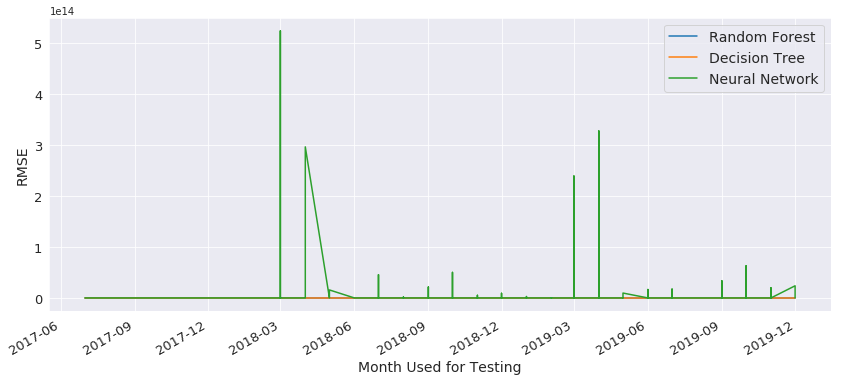

In [91]:
ax =all_res_rmse[9:][["Month Used for Testing","Random Forest", "Decision Tree", "Neural Network"]].set_index('Month Used for Testing').plot(figsize=(14,6),fontsize=13 );
ax.legend(prop={'size':14})
plt.xlabel("Month Used for Testing", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

In [92]:
#all_res[9:].set_index('calendar_month').plot(legend='auto');

NameError: name 'all_res' is not defined

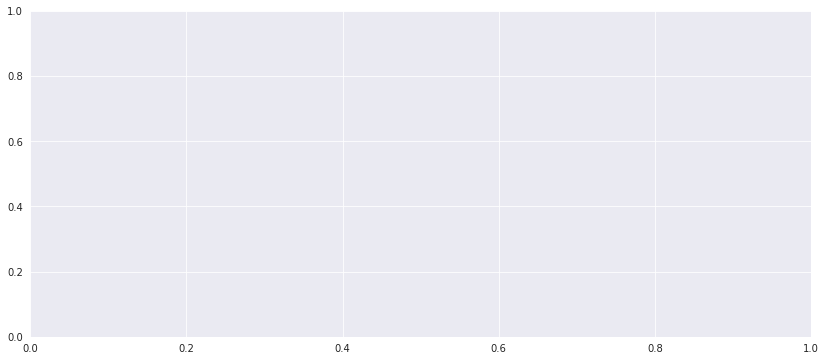

In [93]:
#plotting the overall consumption

f, axe = plt.subplots(1,1, figsize=(14,6))
sns.lineplot( x="calendar_month",y="rmse_nn", data=all_res, palette="Set3", ax=axe)
plt.xticks( fontsize=14, rotation=30)
plt.yticks( fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
#plt.savefig('E:/OneDrive - Higher Education Commission/00DATA/000000000000000/research/summer internship 2020/paper/test.png')
#x_dates = dataset['calendar_month'].dt.strftime('%Y-%m').sort_values().unique()
#axe.set_xticklabels(labels=x_dates, rotation=45, ha='right')

# Learning Curves

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.001,  shuffle=False)
#UN ORDERED TRY
# Create CV training and test scores for various training set sizes
#https://chrisalbon.com/machine_learning/model_evaluation/plot_the_learning_curve/
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
regressor_rf = RandomForestRegressor(n_estimators = 200, random_state = 0)
#regressor_dt = DecisionTreeRegressor(random_state = 0)

regressor_rf.fit(X_train, y_train.ravel())
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(regressor_rf, 
                                                        X_train, 
                                                        y_train.ravel(),
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric 
                                                        #  scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                       train_sizes=np.linspace(0.01, 1.0, 25),
                                                       #train_sizes=list(range(0.1,1,0.1))
                                                       )
                                                       

    
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
#plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot((train_sizes*100/train_sizes.max()), test_mean, color="#111111", label="Cross-validation score")

# Draw bands
#plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes*100/train_sizes.max(), test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Random Forest", fontsize=17)
plt.xlabel("Percentage of Data used ",fontsize=17), plt.ylabel("10-fold Cross Validation Score",  fontsize=17)
#plt.tight_layout()
#plt.axis('equal')
#plt.axis('square')

plt.xticks( fontsize=15)
plt.yticks( fontsize=15)

all_data_rf =[]
for i in range(len(train_sizes)):
    all_data_rf.append([train_sizes[i], train_scores[i],test_scores[i]  ])

plt.show()


In [ ]:
all_RF_ARRAY = []
for col in all_data_rf:
    row = []
    row.append(col[0])
    
    for item in col[1]:
        row.append(item)
    for item in col[2]:
        row.append(item) 
    
    all_RF_ARRAY.append(row)

In [ ]:
import csv

with open("Learning_curve_RF_ordered.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(all_RF_ARRAY)

In [ ]:

# Draw lines
#plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot((train_sizes*100/train_sizes.max()), test_mean, color="#111111", label="Cross-validation score")

# Draw bands
#plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes*100/train_sizes.max(), test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Random Forest", fontsize=17)
plt.xlabel("Percentage of Data used ",fontsize=17), plt.ylabel("10-fold Cross Validation Score",  fontsize=17)
#plt.tight_layout()
#plt.axis('equal')
#plt.axis('square')

plt.xticks( fontsize=15)
plt.yticks( fontsize=15)

plt.show()


In [ ]:
# FOR DECISION TREE
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.001, shuffle=False)
#UN ORDERED TRY
# Create CV training and test scores for various training set sizes
#https://chrisalbon.com/machine_learning/model_evaluation/plot_the_learning_curve/
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)



from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(regressor_dt, 
                                                        X_train, 
                                                        y_train.ravel(),
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                      #  scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                       train_sizes=np.linspace(0.01, 1.0, 25),
                                                       #train_sizes=list(range(0.1,1,0.1))
                                                       )
                                                       

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
# Draw lines
# Draw lines
#plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot((train_sizes*100/train_sizes.max()), test_mean, color="#111111", label="Cross-validation score")

# Draw bands
#plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes*100/train_sizes.max(), test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Decision Tree", fontsize=17)
plt.xlabel("Percentage of Data used ",fontsize=17), plt.ylabel("10-fold Cross Validation Score",  fontsize=17)
#plt.tight_layout()
#plt.axis('equal')
#plt.axis('square')

plt.xticks( fontsize=15)
plt.yticks( fontsize=15)

all_data_DT =[]
for i in range(len(train_sizes)):
    all_data_DT.append([train_sizes[i], train_scores[i],test_scores[i]  ])


plt.show()


In [ ]:

# Draw lines
#plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot((train_sizes*100/train_sizes.max()), test_mean, color="#111111", label="Cross-validation score")

# Draw bands
#plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes*100/train_sizes.max(), test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Random Forest", fontsize=17)
plt.xlabel("Percentage of Data used ",fontsize=17), plt.ylabel("10-fold Cross Validation Score",  fontsize=17)
#plt.tight_layout()
#plt.axis('equal')
#plt.axis('square')

plt.xticks( fontsize=15)
plt.yticks( fontsize=15)

plt.show()


In [ ]:
# FOR DECISION TREE
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.001, shuffle=False)
#UN ORDERED TRY
# Create CV training and test scores for various training set sizes
#https://chrisalbon.com/machine_learning/model_evaluation/plot_the_learning_curve/
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)



from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(regressor_dt, 
                                                        X_train, 
                                                        y_train.ravel(),
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                      #  scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                       train_sizes=np.linspace(0.01, 1.0, 25),
                                                       #train_sizes=list(range(0.1,1,0.1))
                                                       )
                                                       

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
# Draw lines
# Draw lines
#plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot((train_sizes*100/train_sizes.max()), test_mean, color="#111111", label="Cross-validation score")

# Draw bands
#plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes*100/train_sizes.max(), test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Decision Tree", fontsize=17)
plt.xlabel("Percentage of Data used ",fontsize=17), plt.ylabel("10-fold Cross Validation Score",  fontsize=17)
#plt.tight_layout()
#plt.axis('equal')
#plt.axis('square')

plt.xticks( fontsize=15)
plt.yticks( fontsize=15)

plt.show()


In [ ]:
#FOR NEURAL NETWORK
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.001, random_state = 25)
#UN ORDERED TRY
# Create CV training and test scores for various training set sizes
#https://chrisalbon.com/machine_learning/model_evaluation/plot_the_learning_curve/

from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
sc_X.fit(X_train)
X_scaled_train = sc_X.transform(X_train)
X_scaled_test = sc_X.transform(X_test)
from sklearn.neural_network import MLPRegressor
regressor_nn =MLPRegressor(alpha=0.0005, random_state=1, max_iter=2000, verbose=False, hidden_layer_sizes=(100,50,50), n_iter_no_change=20)
regressor_nn.fit(X_scaled_train, y_train.ravel())



from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(regressor_nn, 
                                                        X_scaled_train, 
                                                        y_train.ravel(),
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                      #  scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                       train_sizes=np.linspace(0.01, 1.0, 25),
                                                       #train_sizes=list(range(0.1,1,0.1))
                                                       )
                                                       

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
#plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot((train_sizes*100/train_sizes.max()), test_mean, color="#111111", label="Cross-validation score")

# Draw bands
#plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes*100/train_sizes.max(), test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Neural Network", fontsize=17)
plt.xlabel("Percentage of Data used ",fontsize=17), plt.ylabel("10-fold Cross Validation Score",  fontsize=17)
#plt.tight_layout()
#plt.axis('equal')
#plt.axis('square')

plt.xticks( fontsize=15)
plt.yticks( fontsize=15)

plt.show()


In [ ]:
range(0.1,1,1)

In [ ]:
range(0.01, 1.0, 2)

In [ ]:
[x for x in range(2, 10, 2)]

In [ ]:
[x for x in range(0.01, 1.0, 2)]